In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_clinic = []
tmp = pd.read_csv("train_clinical_data.csv")
tmp["CSF"] = 1
df_clinic.append(tmp)
tmp = pd.read_csv("supplemental_clinical_data.csv")
tmp["CSF"] = 0
df_clinic.append(tmp)
df_clinic = pd.concat(df_clinic, axis=0).reset_index(drop=True)
df_clinic = df_clinic.rename(columns={"upd23b_clinical_state_on_medication": "medication"})

In [4]:
df_clinic

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      NaN   
1         55_3          55            3     10.0      7.0     25.0      NaN   
2         55_6          55            6      8.0     10.0     34.0      NaN   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
4833   65382_0       65382            0      NaN      NaN      0.0      NaN   
4834   65405_0       65405            0      5.0     16.0     31.0      0.0   
4835   65405_5       65405            5      NaN      NaN     57.0      NaN   
4836   65530_0       65530            0     10.0      6.0     24.0      0.0   
4837  65530_36       65530           36      8.0      4.0     15.0      4.0   

     medication  CSF  
0           NaN    1  
1           NaN    1  
2           NaN    1  
3            On    1  
4            On    1  
...         ...  ...  
4833        NaN    0  
4834        NaN    0  
4835        NaN    0  
4836        NaN    0  
4837         On    0  

[4838 rows x 9 columns]

In [5]:
df_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   visit_id     4838 non-null   object 
 1   patient_id   4838 non-null   int64  
 2   visit_month  4838 non-null   int64  
 3   updrs_1      4624 non-null   float64
 4   updrs_2      4622 non-null   float64
 5   updrs_3      4808 non-null   float64
 6   updrs_4      2872 non-null   float64
 7   medication   2410 non-null   object 
 8   CSF          4838 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 340.3+ KB


In [6]:
df_clinic.isna().sum()

visit_id          0
patient_id        0
visit_month       0
updrs_1         214
updrs_2         216
updrs_3          30
updrs_4        1966
medication     2428
CSF               0
dtype: int64

In [7]:
df_clinic.nunique()

visit_id       4838
patient_id     1019
visit_month      18
updrs_1          32
updrs_2          37
updrs_3          75
updrs_4          19
medication        2
CSF               2
dtype: int64

In [8]:
df_clinic.groupby("patient_id").size().describe()

count    1019.000000
mean        4.747792
std         4.050538
min         1.000000
25%         2.000000
50%         2.000000
75%         6.000000
max        17.000000
dtype: float64

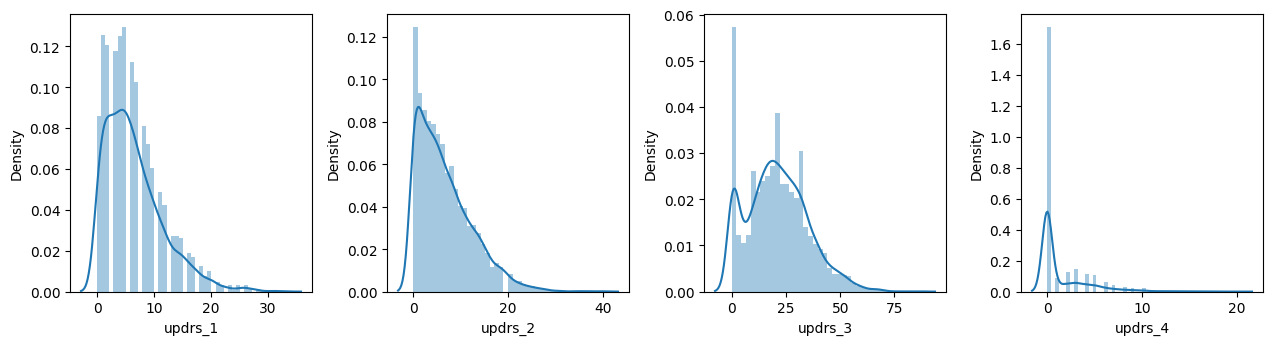

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,30))
features= ['updrs_1','updrs_2','updrs_3','updrs_4']

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.distplot(df_clinic[features[i]])
plt.tight_layout()
plt.show()

**The q-q plots suggest that updrs_1, updrs_2 and updrs_4 have huge deviation from normal distribution wheras updrs_3 is not much deviated and correction is much easier.**

In [10]:
skewness_1 = df_clinic['updrs_1'].skew()
print(f'Skewness for updrs_1 = {skewness_1}')

skewness_2 = df_clinic['updrs_2'].skew()
print(f'Skewness for updrs_2 = {skewness_2}')

skewness_3 = df_clinic['updrs_3'].skew()
print(f'Skewness for updrs_3 = {skewness_3}')

skewness_4 = df_clinic['updrs_4'].skew()
print(f'Skewness for updrs_4 = {skewness_4}')

Skewness for updrs_1 = 1.19772289416051
Skewness for updrs_2 = 1.1140658886401753
Skewness for updrs_3 = 0.4637341727165147
Skewness for updrs_4 = 2.293804042886257


All the above visualizations suggest that
Inferences:
* All targets are not normal distribution
* updrs_4 has zeros as much as about 40% (It seems to be good to impute with zeros)
* all the plots are right/positive skewed

   updrs_1  updrs_2  updrs_3  updrs_4
0     10.0      6.0     15.0      NaN
1     10.0      7.0     25.0      NaN
2      8.0     10.0     34.0      NaN
3      8.0      9.0     30.0      0.0
4     10.0     10.0     41.0      0.0


<AxesSubplot: >

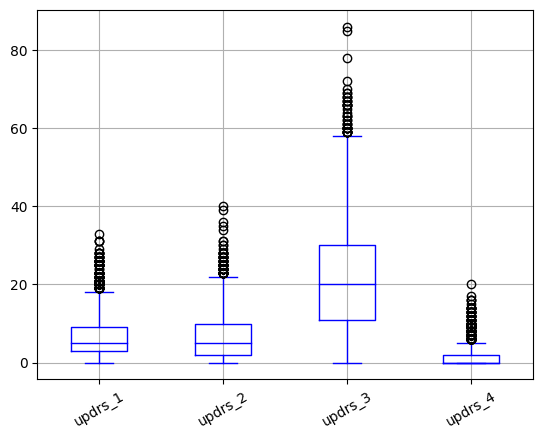

In [11]:
import pandas as pd
import numpy as np
dataframe = pd.DataFrame(df_clinic, columns=['updrs_1','updrs_2','updrs_3','updrs_4'])
print(dataframe.head())
dataframe.boxplot(grid='false', color='blue',fontsize=10, rot=30 )

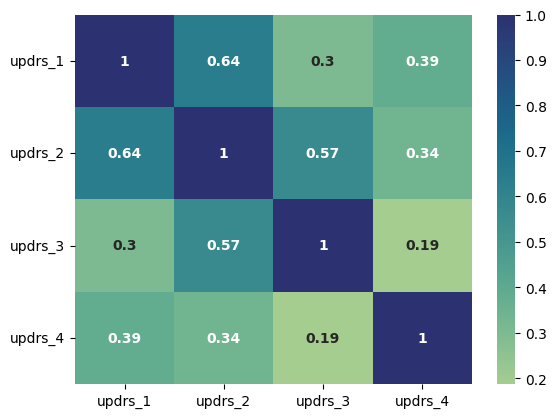

In [12]:
sns.heatmap(df_clinic.filter(regex="updrs_*").dropna().corr(), cmap="crest", annot=True, annot_kws={"fontweight": "bold"})
plt.yticks(rotation=0)
plt.show()

**updrs_2 has high correlation with updrs_1 & updrs_3 (about 0.6)**

In [13]:
df_eda = df_clinic.groupby("patient_id")["visit_month"].max()

**Short-term(0-5) and mid-term(30-36) bins show high medical examination count**

In [14]:
df_eda = df_clinic.groupby("visit_month", as_index=False).mean().dropna()
df_eda

visit_month    patient_id   updrs_1   updrs_2    updrs_3   updrs_4  \
0             0  32284.550540  5.725108  5.734848  18.312684  1.186517   
1             3  33128.895652  5.513043  6.634783  20.482456  0.142857   
3             6  33402.718182  5.938636  6.670455  22.143836  1.427419   
4             9  33544.020202  6.080808  7.204082  20.474747  0.488372   
5            12  32921.261506  5.736402  5.765690  19.726891  0.953668   
6            18  33228.782369  6.344353  6.776860  21.576177  0.938697   
7            24  32608.661327  6.304348  6.153318  19.889145  1.290850   
8            30  33159.085859  6.739899  7.043038  22.650633  1.260736   
9            36  31899.322314  6.981405  6.764463  20.160083  1.042857   
10           42  32411.733766  8.339869  8.372549  22.720779  1.868613   
11           48  32227.581633  7.581633  7.112245  19.378238  1.970588   
12           54  32156.790909  8.600000  9.863636  26.311927  2.051020   
13           60  31770.084337  7.265060  6.500000  19.807229  2.218182   
14           72  33528.666667  8.365591  8.817204  26.450549  2.289157   
15           84  32186.740000  7.730000  8.230000  22.589474  2.938462   
16           96  30539.310345  7.706897  7.775862  21.267857  4.233333   
17          108  32552.833333  9.416667  8.166667  25.250000  2.571429   

         CSF  
0   0.243376  
1   1.000000  
3   0.436364  
4   1.000000  
5   0.508368  
6   0.515152  
7   0.556064  
8   0.436869  
9   0.466942  
10  1.000000  
11  1.000000  
12  1.000000  
13  1.000000  
14  1.000000  
15  1.000000  
16  1.000000  
17  1.000000

**This clearly shows that as time progresses severity of parkinson increases which is also reflected by updrs values**

In [15]:
df_eda = df_clinic.dropna()

In [16]:
train_proteins = pd.read_csv("train_proteins.csv")
train_proteins

visit_id  visit_month  patient_id UniProt       NPX
0            55_0            0          55  O00391   11254.3
1            55_0            0          55  O00533  732430.0
2            55_0            0          55  O00584   39585.8
3            55_0            0          55  O14498   41526.9
4            55_0            0          55  O14773   31238.0
...           ...          ...         ...     ...       ...
232736  58648_108          108       58648  Q9UBX5   27387.8
232737  58648_108          108       58648  Q9UHG2  369437.0
232738  58648_108          108       58648  Q9UKV8  105830.0
232739  58648_108          108       58648  Q9Y646   21257.6
232740  58648_108          108       58648  Q9Y6R7   17953.1

[232741 rows x 5 columns]

In [17]:
train_peptides = pd.read_csv("train_peptides.csv")
train_peptides

visit_id  visit_month  patient_id UniProt  \
0            55_0            0          55  O00391   
1            55_0            0          55  O00533   
2            55_0            0          55  O00533   
3            55_0            0          55  O00533   
4            55_0            0          55  O00533   
...           ...          ...         ...     ...   
981829  58648_108          108       58648  Q9UHG2   
981830  58648_108          108       58648  Q9UKV8   
981831  58648_108          108       58648  Q9Y646   
981832  58648_108          108       58648  Q9Y6R7   
981833  58648_108          108       58648  Q9Y6R7   

                                       Peptide  PeptideAbundance  
0                                NEQEQPLGQWHLS          11254.30  
1                                  GNPEPTFSWTK         102060.00  
2                              IEIPSSVQQVPTIIK         174185.00  
3       KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK          27278.90  
4                                 SMEQNGPGLEYR          30838.70  
...                                        ...               ...  
981829                         ILAGSADSEGVAAPR         202820.00  
981830                           SGNIPAGTTVDTK         105830.00  
981831                             LALLVDTVGPR          21257.60  
981832        AGC(UniMod_4)VAESTAVC(UniMod_4)R           5127.26  
981833                          GATTSPGVYELSSR          12825.90  

[981834 rows x 6 columns]

In [18]:
df_p = train_peptides.merge(train_proteins[['visit_id', 'UniProt', 'NPX']], on=['visit_id','UniProt'], how='left')
df_p.head()

visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55  O00533   

                                  Peptide  PeptideAbundance       NPX  
0                           NEQEQPLGQWHLS           11254.3   11254.3  
1                             GNPEPTFSWTK          102060.0  732430.0  
2                         IEIPSSVQQVPTIIK          174185.0  732430.0  
3  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK           27278.9  732430.0  
4                            SMEQNGPGLEYR           30838.7  732430.0

It makes sense to transfer proteins' NPX value to peptide data on merge, since each protein could consist of multiple peptides.

In [19]:
train_scd = pd.read_csv("supplemental_clinical_data.csv")
train_cd = pd.read_csv("train_clinical_data.csv")

train_scd['visit_id'] = train_scd['patient_id'].astype(str) + "_"+ train_scd['visit_month'].astype(str)

#Here we combine both main and supplemental clinical data into a single dataframe
df_cd = pd.concat([train_cd, train_scd], ignore_index=True)
display(df_cd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             4838 non-null   object 
 1   patient_id                           4838 non-null   int64  
 2   visit_month                          4838 non-null   int64  
 3   updrs_1                              4624 non-null   float64
 4   updrs_2                              4622 non-null   float64
 5   updrs_3                              4808 non-null   float64
 6   updrs_4                              2872 non-null   float64
 7   upd23b_clinical_state_on_medication  2410 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 302.5+ KB


None

In [20]:
print(f'Unique Clinical Data patient #: {train_cd["patient_id"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Clinical Data:')
for col in train_cd.columns:
    print(f'Null values found in {col}: {train_cd[col].isna().sum()}')
print('')

Unique Clinical Data patient #: 248
----------------------------------------------------------
Null Values Found in Clinical Data:
Null values found in visit_id: 0
Null values found in patient_id: 0
Null values found in visit_month: 0
Null values found in updrs_1: 1
Null values found in updrs_2: 2
Null values found in updrs_3: 25
Null values found in updrs_4: 1038
Null values found in upd23b_clinical_state_on_medication: 1327



Since Null values in updrs_3, updrs_2, updrs_1 are too less; we can impute using linear interpolation

In [21]:
train_cd.updrs_1 = train_cd.updrs_3.interpolate(method='linear', axis=0)
train_cd.updrs_2 = train_cd.updrs_3.interpolate(method='linear', axis=0)
train_cd.updrs_3 = train_cd.updrs_3.interpolate(method='linear', axis=0)
train_cd['updrs_4'] = train_cd['updrs_4'].fillna(0)

In [22]:
print(f'Unique Clinical Data patient #: {train_cd["patient_id"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Clinical Data:')
for col in train_cd.columns:
    print(f'Null values found in {col}: {train_cd[col].isna().sum()}')
print('')

Unique Clinical Data patient #: 248
----------------------------------------------------------
Null Values Found in Clinical Data:
Null values found in visit_id: 0
Null values found in patient_id: 0
Null values found in visit_month: 0
Null values found in updrs_1: 0
Null values found in updrs_2: 0
Null values found in updrs_3: 0
Null values found in updrs_4: 0
Null values found in upd23b_clinical_state_on_medication: 1327



In [23]:
df_cd.melt(id_vars=['visit_id', 'patient_id', 'visit_month', 'upd23b_clinical_state_on_medication'], 
                   var_name='updrs', value_name='rating')

visit_id  patient_id  visit_month upd23b_clinical_state_on_medication  \
0          55_0          55            0                                 NaN   
1          55_3          55            3                                 NaN   
2          55_6          55            6                                 NaN   
3          55_9          55            9                                  On   
4         55_12          55           12                                  On   
...         ...         ...          ...                                 ...   
19347   65382_0       65382            0                                 NaN   
19348   65405_0       65405            0                                 NaN   
19349   65405_5       65405            5                                 NaN   
19350   65530_0       65530            0                                 NaN   
19351  65530_36       65530           36                                  On   

         updrs  rating  
0      updrs_1    10.0  
1      updrs_1    10.0  
2      updrs_1     8.0  
3      updrs_1     8.0  
4      updrs_1    10.0  
...        ...     ...  
19347  updrs_4     NaN  
19348  updrs_4     0.0  
19349  updrs_4     NaN  
19350  updrs_4     0.0  
19351  updrs_4     4.0  

[19352 rows x 6 columns]

In [24]:
df_all = df_p.merge(df_cd[['visit_id','updrs_1','updrs_2','updrs_3','updrs_4','upd23b_clinical_state_on_medication']], on=['visit_id'], how='left')
df_all.info()
df_all

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981834 entries, 0 to 981833
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             981834 non-null  object 
 1   visit_month                          981834 non-null  int64  
 2   patient_id                           981834 non-null  int64  
 3   UniProt                              981834 non-null  object 
 4   Peptide                              981834 non-null  object 
 5   PeptideAbundance                     981834 non-null  float64
 6   NPX                                  981834 non-null  float64
 7   updrs_1                              941744 non-null  float64
 8   updrs_2                              941744 non-null  float64
 9   updrs_3                              932624 non-null  float64
 10  updrs_4                              495530 non-null  float64
 11  upd23b_clinic

visit_id  visit_month  patient_id UniProt  \
0            55_0            0          55  O00391   
1            55_0            0          55  O00533   
2            55_0            0          55  O00533   
3            55_0            0          55  O00533   
4            55_0            0          55  O00533   
...           ...          ...         ...     ...   
981829  58648_108          108       58648  Q9UHG2   
981830  58648_108          108       58648  Q9UKV8   
981831  58648_108          108       58648  Q9Y646   
981832  58648_108          108       58648  Q9Y6R7   
981833  58648_108          108       58648  Q9Y6R7   

                                       Peptide  PeptideAbundance       NPX  \
0                                NEQEQPLGQWHLS          11254.30   11254.3   
1                                  GNPEPTFSWTK         102060.00  732430.0   
2                              IEIPSSVQQVPTIIK         174185.00  732430.0   
3       KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK          27278.90  732430.0   
4                                 SMEQNGPGLEYR          30838.70  732430.0   
...                                        ...               ...       ...   
981829                         ILAGSADSEGVAAPR         202820.00  369437.0   
981830                           SGNIPAGTTVDTK         105830.00  105830.0   
981831                             LALLVDTVGPR          21257.60   21257.6   
981832        AGC(UniMod_4)VAESTAVC(UniMod_4)R           5127.26   17953.1   
981833                          GATTSPGVYELSSR          12825.90   17953.1   

        updrs_1  updrs_2  updrs_3  updrs_4 upd23b_clinical_state_on_medication  
0          10.0      6.0     15.0      NaN                                 NaN  
1          10.0      6.0     15.0      NaN                                 NaN  
2          10.0      6.0     15.0      NaN                                 NaN  
3          10.0      6.0     15.0      NaN                                 NaN  
4          10.0      6.0     15.0      NaN                                 NaN  
...         ...      ...      ...      ...                                 ...  
981829      6.0      0.0      0.0      NaN                                 NaN  
981830      6.0      0.0      0.0      NaN                                 NaN  
981831      6.0      0.0      0.0      NaN                                 NaN  
981832      6.0      0.0      0.0      NaN                                 NaN  
981833      6.0      0.0      0.0      NaN                                 NaN  

[981834 rows x 12 columns]

In [25]:
print("\n.... Total patients: ", train_peptides.patient_id.nunique())

print("\n.... Total number of visits:", train_proteins['visit_id'].nunique())

print("\n.... Total proteins: ", train_proteins.UniProt.nunique())

print("\n.... Total peptides: ", train_peptides.Peptide.nunique())

print("\n.... Months counts:")
print(train_proteins.visit_month.value_counts())

#what is u r name 


.... Total patients:  248

.... Total number of visits: 1113

.... Total proteins:  227

.... Total peptides:  968

.... Months counts:
0      40587
12     37467
24     36225
36     31156
48     28838
6      25991
60     17572
84      6288
72      4407
18      1657
108      855
3        641
96       423
54       418
30       216
Name: visit_month, dtype: int64


<AxesSubplot: >

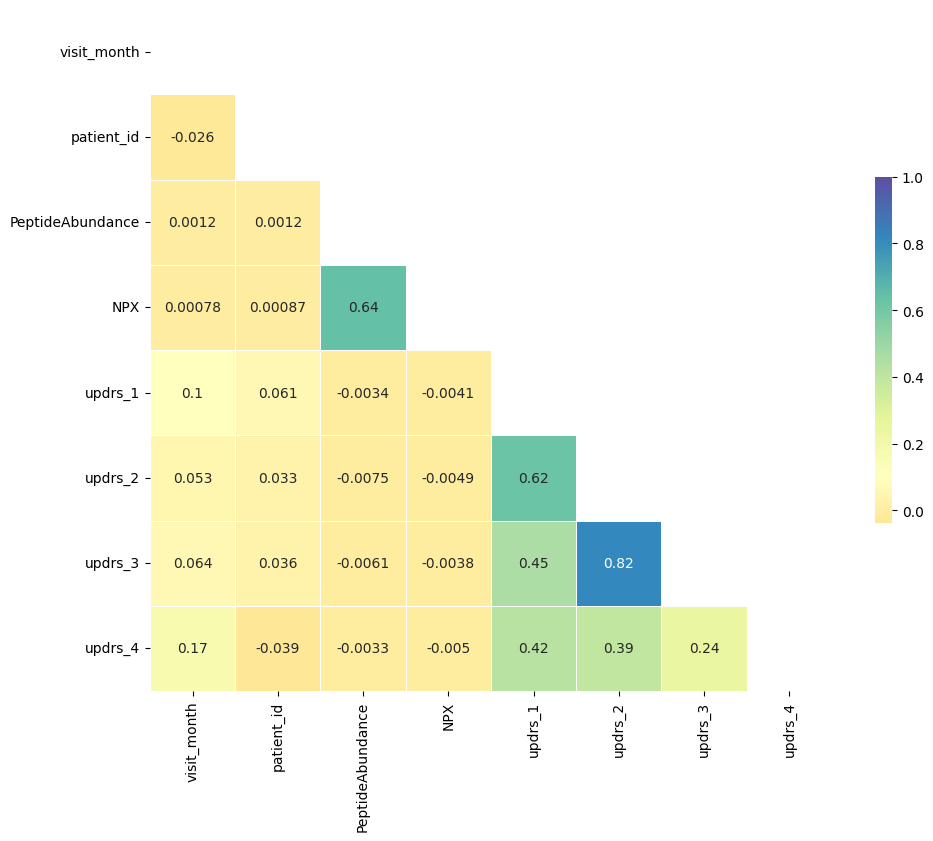

In [26]:
corr = df_all.corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=1, center=0.1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_all, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
print(f'Unique Clinical Data patient #: {df_all["patient_id"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Clinical Data:')
for col in df_all.columns:
    print(f'Null values found in {col}: {df_all[col].isna().sum()}')
print('')

Unique Clinical Data patient #: 248
----------------------------------------------------------
Null Values Found in Clinical Data:
Null values found in visit_id: 0
Null values found in visit_month: 0
Null values found in patient_id: 0
Null values found in UniProt: 0
Null values found in Peptide: 0
Null values found in PeptideAbundance: 0
Null values found in NPX: 0
Null values found in updrs_1: 40090
Null values found in updrs_2: 40090
Null values found in updrs_3: 49210
Null values found in updrs_4: 486304
Null values found in upd23b_clinical_state_on_medication: 590109



# **Correlation Analysis**

In [29]:
import scipy.stats as st
import pandas as pd
import plotly.express as px

In [30]:
df_clinic

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      NaN   
1         55_3          55            3     10.0      7.0     25.0      NaN   
2         55_6          55            6      8.0     10.0     34.0      NaN   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
4833   65382_0       65382            0      NaN      NaN      0.0      NaN   
4834   65405_0       65405            0      5.0     16.0     31.0      0.0   
4835   65405_5       65405            5      NaN      NaN     57.0      NaN   
4836   65530_0       65530            0     10.0      6.0     24.0      0.0   
4837  65530_36       65530           36      8.0      4.0     15.0      4.0   

     medication  CSF  
0           NaN    1  
1           NaN    1  
2           NaN    1  
3            On    1  
4            On    1  
...         ...  ...  
4833        NaN    0  
4834        NaN    0  
4835        NaN    0  
4836        NaN    0  
4837         On    0  

[4838 rows x 9 columns]

In [31]:
df_clinic=df_clinic.dropna()

In [32]:
print(df_clinic[['updrs_1','updrs_2','updrs_3']])

      updrs_1  updrs_2  updrs_3
3         8.0      9.0     30.0
4        10.0     10.0     41.0
5         7.0     13.0     38.0
6        16.0      9.0     49.0
7        14.0     13.0     49.0
...       ...      ...      ...
4823     26.0     20.0     31.0
4828      4.0     14.0     13.0
4829      2.0     13.0     14.0
4830      4.0     16.0     13.0
4837      8.0      4.0     15.0

[2076 rows x 3 columns]


In [33]:
x = df_clinic['updrs_1']
y = df_clinic['updrs_2']
z = df_clinic['updrs_3']


In [34]:
print("the pearson correlation between updrs_1 and updrs_2 values:")
st.pearsonr(x,y)[0]

the pearson correlation between updrs_1 and updrs_2 values:


0.6123822155904514

In [35]:
print("the pearson correlation between updrs_2 and updrs_3 values:")
st.pearsonr(y,z)[0]

the pearson correlation between updrs_2 and updrs_3 values:


0.5302471946187702

In [36]:
print("the pearson correlation between updrs_1 and updrs_3 values:")
st.pearsonr(x,z)[0]

the pearson correlation between updrs_1 and updrs_3 values:


0.2546524247892682

inference:
as we already know that updrs_2 is nearly strongly corelated with updrs_1 and 3
but correlation of updrs_1 and updrs_3 is weak but positive 

In [37]:
train_proteins

visit_id  visit_month  patient_id UniProt       NPX
0            55_0            0          55  O00391   11254.3
1            55_0            0          55  O00533  732430.0
2            55_0            0          55  O00584   39585.8
3            55_0            0          55  O14498   41526.9
4            55_0            0          55  O14773   31238.0
...           ...          ...         ...     ...       ...
232736  58648_108          108       58648  Q9UBX5   27387.8
232737  58648_108          108       58648  Q9UHG2  369437.0
232738  58648_108          108       58648  Q9UKV8  105830.0
232739  58648_108          108       58648  Q9Y646   21257.6
232740  58648_108          108       58648  Q9Y6R7   17953.1

[232741 rows x 5 columns]

In [38]:
print(train_proteins[['UniProt','NPX']])

       UniProt       NPX
0       O00391   11254.3
1       O00533  732430.0
2       O00584   39585.8
3       O14498   41526.9
4       O14773   31238.0
...        ...       ...
232736  Q9UBX5   27387.8
232737  Q9UHG2  369437.0
232738  Q9UKV8  105830.0
232739  Q9Y646   21257.6
232740  Q9Y6R7   17953.1

[232741 rows x 2 columns]


In [39]:
x = train_proteins['UniProt']
y = train_proteins['NPX']
print("the spearman correlation between UniProt and NPX values:")
st.spearmanr(x,y).correlation

the spearman correlation between UniProt and NPX values:


-0.28635903235123744

In [40]:
train_peptides

visit_id  visit_month  patient_id UniProt  \
0            55_0            0          55  O00391   
1            55_0            0          55  O00533   
2            55_0            0          55  O00533   
3            55_0            0          55  O00533   
4            55_0            0          55  O00533   
...           ...          ...         ...     ...   
981829  58648_108          108       58648  Q9UHG2   
981830  58648_108          108       58648  Q9UKV8   
981831  58648_108          108       58648  Q9Y646   
981832  58648_108          108       58648  Q9Y6R7   
981833  58648_108          108       58648  Q9Y6R7   

                                       Peptide  PeptideAbundance  
0                                NEQEQPLGQWHLS          11254.30  
1                                  GNPEPTFSWTK         102060.00  
2                              IEIPSSVQQVPTIIK         174185.00  
3       KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK          27278.90  
4                                 SMEQNGPGLEYR          30838.70  
...                                        ...               ...  
981829                         ILAGSADSEGVAAPR         202820.00  
981830                           SGNIPAGTTVDTK         105830.00  
981831                             LALLVDTVGPR          21257.60  
981832        AGC(UniMod_4)VAESTAVC(UniMod_4)R           5127.26  
981833                          GATTSPGVYELSSR          12825.90  

[981834 rows x 6 columns]

In [41]:
print(train_peptides[['UniProt','Peptide','PeptideAbundance']])

       UniProt                                 Peptide  PeptideAbundance
0       O00391                           NEQEQPLGQWHLS          11254.30
1       O00533                             GNPEPTFSWTK         102060.00
2       O00533                         IEIPSSVQQVPTIIK         174185.00
3       O00533  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK          27278.90
4       O00533                            SMEQNGPGLEYR          30838.70
...        ...                                     ...               ...
981829  Q9UHG2                         ILAGSADSEGVAAPR         202820.00
981830  Q9UKV8                           SGNIPAGTTVDTK         105830.00
981831  Q9Y646                             LALLVDTVGPR          21257.60
981832  Q9Y6R7        AGC(UniMod_4)VAESTAVC(UniMod_4)R           5127.26
981833  Q9Y6R7                          GATTSPGVYELSSR          12825.90

[981834 rows x 3 columns]


In [42]:
x = train_peptides['UniProt']
y = train_peptides['Peptide']
z = train_peptides['PeptideAbundance']
print("the spearman correlation between UniProt and PeptideAbundance values:")
st.spearmanr(x,z).correlation

the spearman correlation between UniProt and PeptideAbundance values:


-0.1598701337706347

In [43]:
print("the spearman correlation between Peptide and PeptideAbundance values:")
st.spearmanr(y,z).correlation

the spearman correlation between Peptide and PeptideAbundance values:


0.031790835174999116

### Validation of Correlation using Linear Regression

In [44]:
def calculateB(x, y, n):

    sx = sum(x)
    sy = sum(y)
    sxsy = 0

    sx2 = 0
 
    for i in range(n):
        sxsy += x[i] * y[i]
        sx2 += x[i] * x[i]
    b = (n * sxsy - sx * sy)/(n * sx2 - sx * sx)
    return b
 

def leastRegLine(X,Y,n):
     
    # Finding b
    b = calculateB(X, Y, n)
    meanX = int(sum(X)/n)
    meanY = int(sum(Y)/n)

    a = meanY - b * meanX

    print("Regression line:")
    print("Y = ", '%.3f'%a, " + ", '%.3f'%b, "*X", sep="")
 

X = df_clinic['updrs_1'].values
Y = df_clinic['updrs_2'].values
Z = df_clinic['updrs_3'].values
n = len(X)
print('best fit line for updrs_1 vs updrs_2 :')
leastRegLine(X, Y, n)
print('best fit line for updrs_2 vs updrs_3 :')
leastRegLine(Y, Z, n)
print('best fit line for updrs_1 vs updrs_3 :')
leastRegLine(X, Z, n)

best fit line for updrs_1 vs updrs_2 :
Regression line:
Y = 2.806 + 0.649*X
best fit line for updrs_2 vs updrs_3 :
Regression line:
Y = 15.932 + 1.133*X
best fit line for updrs_1 vs updrs_3 :
Regression line:
Y = 20.383 + 0.577*X


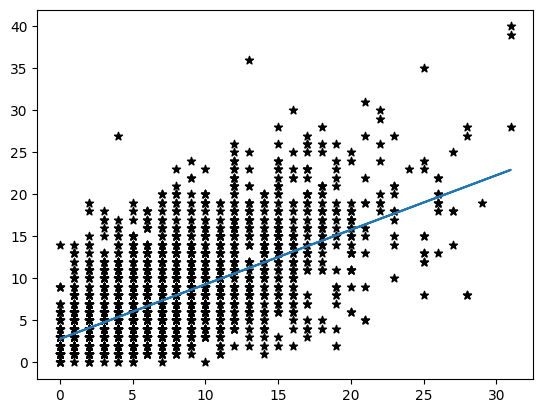

In [45]:
b = calculateB(X, Y, n)
meanX = int(sum(X)/n)
meanY = int(sum(Y)/n)
    
a = meanY - b * meanX

import matplotlib.pyplot as plt

X = df_clinic['updrs_1'].values
Y = df_clinic['updrs_2'].values

# Drawn a simple scatter plot for the data given
plt.scatter(X, Y, marker='*', color='k')

# Plotting the straight line by using the generated parameters
plt.plot(X, b*X+a)

plt.show()


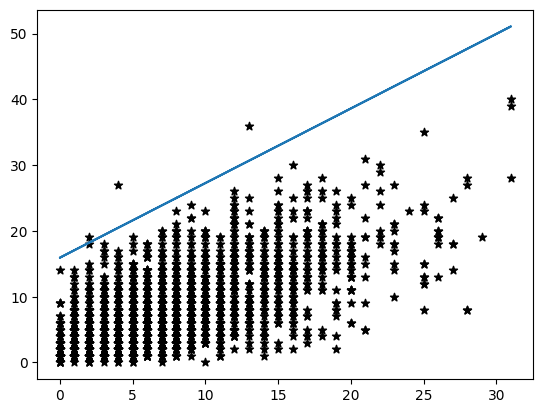

In [46]:
b = calculateB(Y, Z, n)
meanX = int(sum(Y)/n)
meanY = int(sum(Z)/n)
    
a = meanY - b * meanX

import matplotlib.pyplot as plt

X = df_clinic['updrs_1'].values
Y = df_clinic['updrs_2'].values

# Drawn a simple scatter plot for the data given
plt.scatter(X, Y, marker='*', color='k')

# Plotting the straight line by using the generated parameters
plt.plot(X, b*X+a)

plt.show()

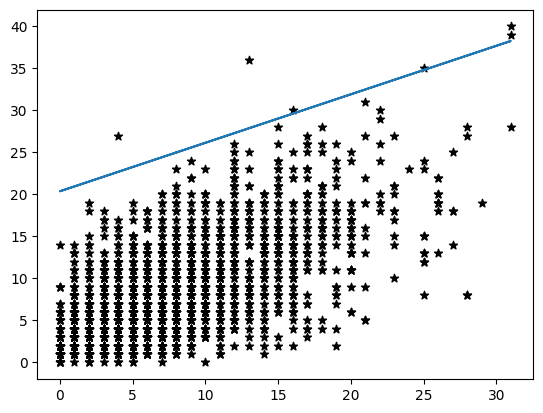

In [47]:
b = calculateB(X, Z, n)
meanX = int(sum(X)/n)
meanY = int(sum(Z)/n)
    
a = meanY - b * meanX

import matplotlib.pyplot as plt

X = df_clinic['updrs_1'].values
Y = df_clinic['updrs_2'].values

# Drawn a simple scatter plot for the data given
plt.scatter(X, Y, marker='*', color='k')

# Plotting the straight line by using the generated parameters
plt.plot(X, b*X+a)

plt.show()

In [48]:

proteins = []
protein_dict = {}

train_clinical_data = pd.read_csv("train_clinical_data.csv")
train_peptides = pd.read_csv("train_peptides.csv")
train_protiens = pd.read_csv("train_proteins.csv")

for index, row in train_protiens.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
        proteins.append(protein)
    protein_dict[protein][row["visit_id"]] = row["NPX"]
    
peptides = []
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
        peptides.append(peptide)
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]
    
train_copy = train_clinical_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
    
for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])

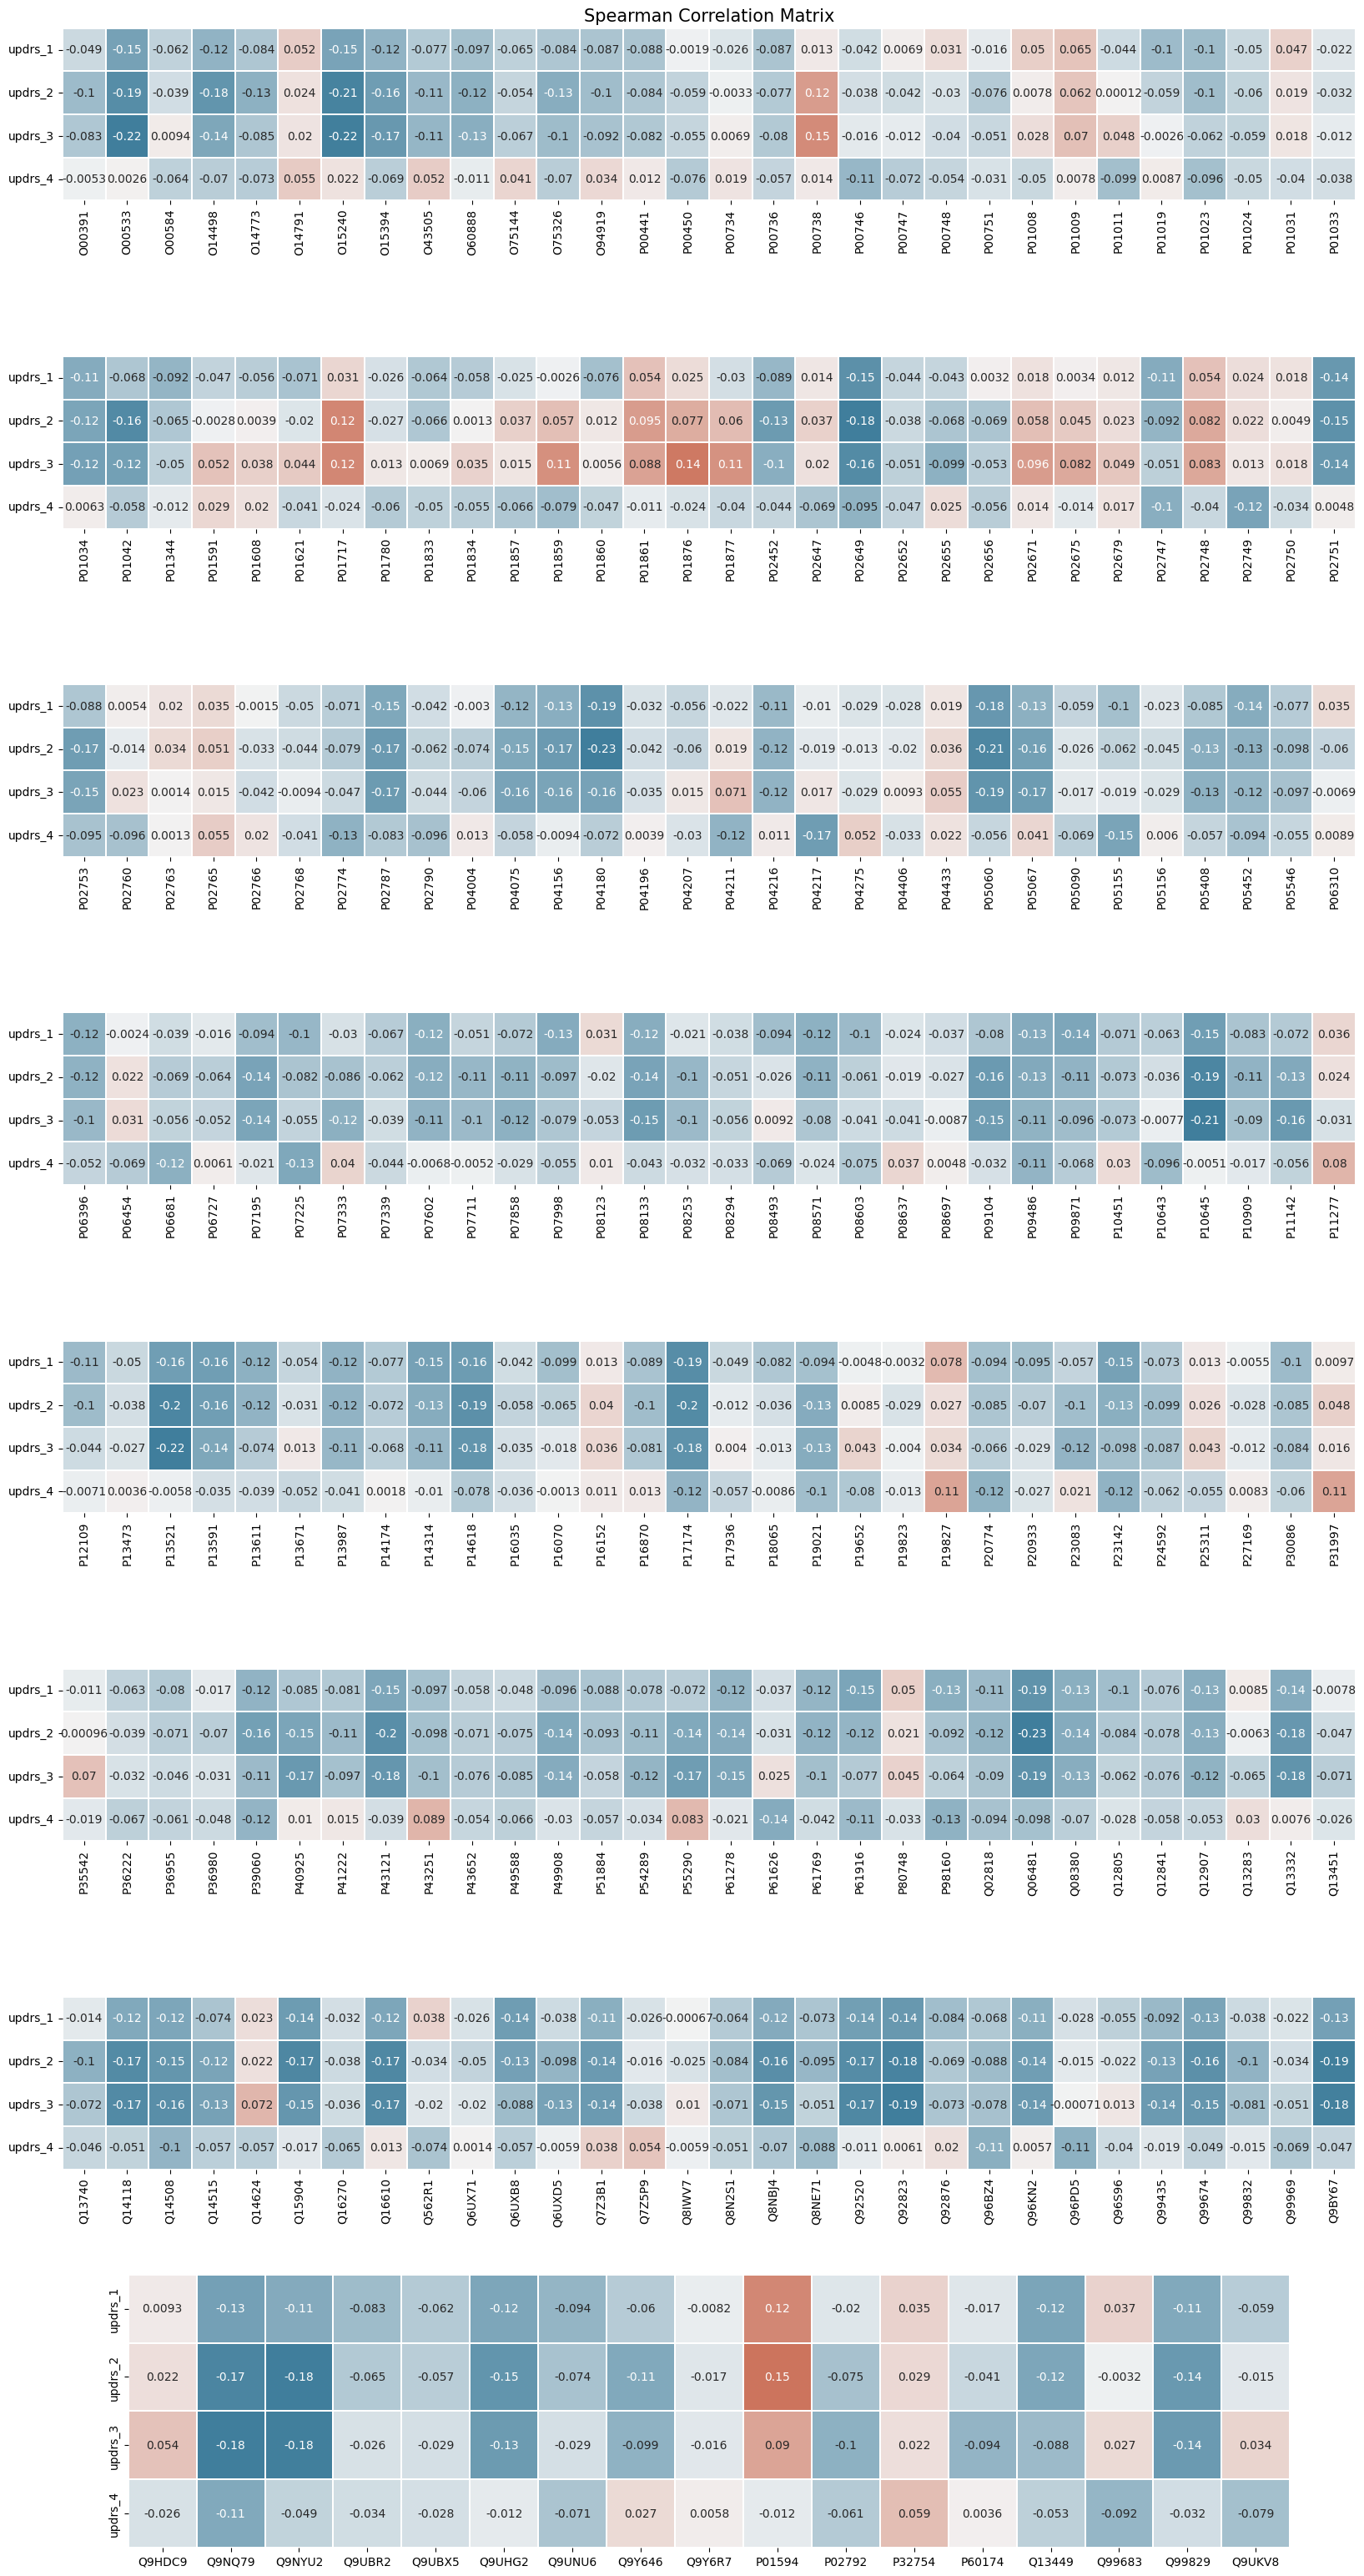

In [49]:
features = []
features.extend(proteins)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))

axs = axs.flatten()

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,0:30],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[0], annot=True,
)
_ = axs[0].set_title("Spearman Correlation Matrix", fontsize=15)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,30:60],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[1], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,60:90],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[2], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,90:120],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[3], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,120:150],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[4], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,150:180],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[5], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,180:210],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[6], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,210:227],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[7], annot=True,
)

# **Covariance**

In [50]:
df = pd.DataFrame({"updrs_1":X, 
                   "updrs_2":Y,
                   "updrs_3":Z})
df.cov()
  

updrs_1    updrs_2     updrs_3
updrs_1  31.134410  20.215184   17.969788
updrs_2  20.215184  35.000127   39.672358
updrs_3  17.969788  39.672358  159.937257

# **Feature Selection**

### Define Metric SMAPE

In [51]:
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true != 0)|(y_pred != 0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * np.mean(smap)

### Proteins Data

In [52]:
proteins = pd.read_csv('train_proteins.csv')
print('Proteins shape:',proteins.shape)
proteins.head()

Proteins shape: (232741, 5)


visit_id  visit_month  patient_id UniProt       NPX
0     55_0            0          55  O00391   11254.3
1     55_0            0          55  O00533  732430.0
2     55_0            0          55  O00584   39585.8
3     55_0            0          55  O14498   41526.9
4     55_0            0          55  O14773   31238.0

### Peptides Data

In [53]:
peptides = pd.read_csv('train_peptides.csv')
print('Peptides shape:', peptides.shape)
peptides.head()

Peptides shape: (981834, 6)


visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55  O00533   

                                  Peptide  PeptideAbundance  
0                           NEQEQPLGQWHLS           11254.3  
1                             GNPEPTFSWTK          102060.0  
2                         IEIPSSVQQVPTIIK          174185.0  
3  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK           27278.9  
4                            SMEQNGPGLEYR           30838.7

### Clinical Data

In [54]:
clinical = pd.read_csv('train_clinical_data.csv')
print('Clinical shape:', clinical.shape)
clinical.head()

Clinical shape: (2615, 8)


visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0     55_0          55            0     10.0      6.0     15.0      NaN   
1     55_3          55            3     10.0      7.0     25.0      NaN   
2     55_6          55            6      8.0     10.0     34.0      NaN   
3     55_9          55            9      8.0      9.0     30.0      0.0   
4    55_12          55           12     10.0     10.0     41.0      0.0   

  upd23b_clinical_state_on_medication  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                  On  
4                                  On

### Merge the Train Data

In [55]:
# Merge the proteins data and peptides data on the common columns.
merged_proteins_peptides = pd.merge(proteins, peptides, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])

# Merge the merged protein-peptides data with the clinical data on the common columns.
merged = pd.merge(merged_proteins_peptides, clinical, on = ['visit_id', 'visit_month', 'patient_id'])

# Show the merged data.
merged

visit_id  visit_month  patient_id UniProt       NPX  \
0            55_0            0          55  O00391   11254.3   
1            55_0            0          55  O00533  732430.0   
2            55_0            0          55  O00533  732430.0   
3            55_0            0          55  O00533  732430.0   
4            55_0            0          55  O00533  732430.0   
...           ...          ...         ...     ...       ...   
941739  58648_108          108       58648  Q9UHG2  369437.0   
941740  58648_108          108       58648  Q9UKV8  105830.0   
941741  58648_108          108       58648  Q9Y646   21257.6   
941742  58648_108          108       58648  Q9Y6R7   17953.1   
941743  58648_108          108       58648  Q9Y6R7   17953.1   

                                       Peptide  PeptideAbundance  updrs_1  \
0                                NEQEQPLGQWHLS          11254.30     10.0   
1                                  GNPEPTFSWTK         102060.00     10.0   
2                              IEIPSSVQQVPTIIK         174185.00     10.0   
3       KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK          27278.90     10.0   
4                                 SMEQNGPGLEYR          30838.70     10.0   
...                                        ...               ...      ...   
941739                         ILAGSADSEGVAAPR         202820.00      6.0   
941740                           SGNIPAGTTVDTK         105830.00      6.0   
941741                             LALLVDTVGPR          21257.60      6.0   
941742        AGC(UniMod_4)VAESTAVC(UniMod_4)R           5127.26      6.0   
941743                          GATTSPGVYELSSR          12825.90      6.0   

        updrs_2  updrs_3  updrs_4 upd23b_clinical_state_on_medication  
0           6.0     15.0      NaN                                 NaN  
1           6.0     15.0      NaN                                 NaN  
2           6.0     15.0      NaN                                 NaN  
3           6.0     15.0      NaN                                 NaN  
4           6.0     15.0      NaN                                 NaN  
...         ...      ...      ...                                 ...  
941739      0.0      0.0      NaN                                 NaN  
941740      0.0      0.0      NaN                                 NaN  
941741      0.0      0.0      NaN                                 NaN  
941742      0.0      0.0      NaN                                 NaN  
941743      0.0      0.0      NaN                                 NaN  

[941744 rows x 12 columns]

In [56]:
# Pivot the data.
pivoted = merged.pivot(index = 'visit_id', columns = ['Peptide'], values = 'PeptideAbundance')

# See the pivoted data.
pivoted

Peptide   AADDTWEPFASGK  AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
visit_id                                                                    
10053_0       6580710.0                                           31204.4   
10053_12      6333510.0                                           52277.6   
10053_18      7129640.0                                           61522.0   
10138_12      7404780.0                                           46107.2   
10138_24     13788300.0                                           56910.3   
...                 ...                                               ...   
8699_24       6312970.0                                           44462.7   
942_12       11289900.0                                           46111.7   
942_24       10161900.0                                           32145.0   
942_48        8248490.0                                           30563.4   
942_6         6177730.0                                           42682.6   

Peptide   AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
visit_id                                                  
10053_0                          7735070.0          NaN   
10053_12                         5394390.0          NaN   
10053_18                         7011920.0      35984.7   
10138_12                        10610900.0          NaN   
10138_24                         6906160.0      13785.5   
...                                    ...          ...   
8699_24                         12455000.0      11051.3   
942_12                          11297300.0          NaN   
942_24                          12388000.0      25869.2   
942_48                          11882600.0          NaN   
942_6                            3596660.0      25698.8   

Peptide   AATGEC(UniMod_4)TATVGKR  AATVGSLAGQPLQER  AAVYHHFISDGVR  \
visit_id                                                            
10053_0                       NaN              NaN        46620.3   
10053_12                      NaN              NaN        57554.5   
10053_18                 17188.00          19787.3        36029.4   
10138_12                 20910.20          66662.3        55253.9   
10138_24                 11004.20          63672.7        36819.8   
...                           ...              ...            ...   
8699_24                   1163.18          43279.8        67743.5   
942_12                   13894.10          53755.0        40289.3   
942_24                   17341.80          48625.5        45223.9   
942_48                   19114.90          60221.4        46685.9   
942_6                    17130.60          86471.5        41007.9   

Peptide   ADDKETC(UniMod_4)FAEEGK  ADDKETC(UniMod_4)FAEEGKK  \
visit_id                                                      
10053_0                  236144.0                       NaN   
10053_12                 108298.0                   45885.4   
10053_18                 708729.0                 5067790.0   
10138_12                  79575.5                 6201210.0   
10138_24                  34160.9                 2117430.0   
...                           ...                       ...   
8699_24                  325328.0                 4666550.0   
942_12                   565112.0                       NaN   
942_24                    84448.0                 4684800.0   
942_48                    81282.9                 5542110.0   
942_6                     63761.4                 4962030.0   

Peptide   ADDLGKGGNEESTKTGNAGSR  ...  YSLTYIYTGLSK  YTTEIIK  YVGGQEHFAHLLILR  \
visit_id                         ...                                           
10053_0                     NaN  ...      202274.0      NaN        4401830.0   
10053_12                    NaN  ...      201009.0      NaN        5001750.0   
10053_18                30838.2  ...      220728.0      NaN        5424380.0   
10138_12                26720.0  ...      188362.0  9433.71        3900280.0   
10138_24                15645.2 

In [57]:
# Add visit_month, the 4 scores, and medication status.
df = pd.merge(clinical, pivoted, on = 'visit_id', how = 'right').set_index('visit_id')
df

patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
visit_id                                                                
10053_0        10053            0      3.0      0.0     13.0      0.0   
10053_12       10053           12      4.0      2.0      8.0      0.0   
10053_18       10053           18      2.0      2.0      0.0      0.0   
10138_12       10138           12      3.0      6.0     31.0      0.0   
10138_24       10138           24      4.0      7.0     19.0     10.0   
...              ...          ...      ...      ...      ...      ...   
8699_24         8699           24     11.0     10.0     13.0      2.0   
942_12           942           12      5.0      2.0     25.0      0.0   
942_24           942           24      2.0      3.0     23.0      NaN   
942_48           942           48      2.0      6.0     35.0      0.0   
942_6            942            6      8.0      2.0     21.0      NaN   

         upd23b_clinical_state_on_medication  AADDTWEPFASGK  \
visit_id                                                      
10053_0                                  NaN      6580710.0   
10053_12                                 NaN      6333510.0   
10053_18                                 NaN      7129640.0   
10138_12                                  On      7404780.0   
10138_24                                  On     13788300.0   
...                                      ...            ...   
8699_24                                   On      6312970.0   
942_12                                   NaN     11289900.0   
942_24                                   NaN     10161900.0   
942_48                                   NaN      8248490.0   
942_6                                    NaN      6177730.0   

          AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
visit_id                                                     
10053_0                                            31204.4   
10053_12                                           52277.6   
10053_18                                           61522.0   
10138_12                                           46107.2   
10138_24                                           56910.3   
...                                                    ...   
8699_24                                            44462.7   
942_12                                             46111.7   
942_24                                             32145.0   
942_48                                             30563.4   
942_6                                              42682.6   

          AAFTEC(UniMod_4)C(UniMod_4)QAADK  ...  YSLTYIYTGLSK  YTTEIIK  \
visit_id                                    ...                          
10053_0                          7735070.0  ...      202274.0      NaN   
10053_12                         5394390.0  ...      201009.0      NaN   
10053_18                         7011920.0  ...      220728.0      NaN   
10138_12                        10610900.0  ...      188362.0  9433.71   
10138_24                         6906160.0  ...      206187.0  6365.15   
...                                    ...  ...           ...      ...   
8699_24                         12455000.0  ...      289888.0  8615.27   
942_12                          11297300.0  ...      173259.0  4767.63   
942_24                          12388000.0  ...      185428.0  5554.53   
942_48                          11882600.0  ...      137611.0  6310.09   
942_6                            3596660.0  ...      226314.0  6399.80   

          YVGGQEHFAHLLILR  YVM(UniMod_35)LPVADQDQC(UniMod_4)IR  \
visit_id                                                         
10053_0         4401830.0                              77482.6   
10053_12        5001750.0                              36745.3   
10053_18        5424380.0                              39016.0   
10138_12        3900280.0                              48210.3   
10138_24        3521800.0                              69984.6   
...     

In [58]:
# Insert the visit_month column to the desired position.
df.insert(6, 'visit_month', df.pop('visit_month'))
df

patient_id  updrs_1  updrs_2  updrs_3  updrs_4  \
visit_id                                                   
10053_0        10053      3.0      0.0     13.0      0.0   
10053_12       10053      4.0      2.0      8.0      0.0   
10053_18       10053      2.0      2.0      0.0      0.0   
10138_12       10138      3.0      6.0     31.0      0.0   
10138_24       10138      4.0      7.0     19.0     10.0   
...              ...      ...      ...      ...      ...   
8699_24         8699     11.0     10.0     13.0      2.0   
942_12           942      5.0      2.0     25.0      0.0   
942_24           942      2.0      3.0     23.0      NaN   
942_48           942      2.0      6.0     35.0      0.0   
942_6            942      8.0      2.0     21.0      NaN   

         upd23b_clinical_state_on_medication  visit_month  AADDTWEPFASGK  \
visit_id                                                                   
10053_0                                  NaN            0      6580710.0   
10053_12                                 NaN           12      6333510.0   
10053_18                                 NaN           18      7129640.0   
10138_12                                  On           12      7404780.0   
10138_24                                  On           24     13788300.0   
...                                      ...          ...            ...   
8699_24                                   On           24      6312970.0   
942_12                                   NaN           12     11289900.0   
942_24                                   NaN           24     10161900.0   
942_48                                   NaN           48      8248490.0   
942_6                                    NaN            6      6177730.0   

          AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
visit_id                                                     
10053_0                                            31204.4   
10053_12                                           52277.6   
10053_18                                           61522.0   
10138_12                                           46107.2   
10138_24                                           56910.3   
...                                                    ...   
8699_24                                            44462.7   
942_12                                             46111.7   
942_24                                             32145.0   
942_48                                             30563.4   
942_6                                              42682.6   

          AAFTEC(UniMod_4)C(UniMod_4)QAADK  ...  YSLTYIYTGLSK  YTTEIIK  \
visit_id                                    ...                          
10053_0                          7735070.0  ...      202274.0      NaN   
10053_12                         5394390.0  ...      201009.0      NaN   
10053_18                         7011920.0  ...      220728.0      NaN   
10138_12                        10610900.0  ...      188362.0  9433.71   
10138_24                         6906160.0  ...      206187.0  6365.15   
...                                    ...  ...           ...      ...   
8699_24                         12455000.0  ...      289888.0  8615.27   
942_12                          11297300.0  ...      173259.0  4767.63   
942_24                          12388000.0  ...      185428.0  5554.53   
942_48                          11882600.0  ...      137611.0  6310.09   
942_6                            3596660.0  ...      226314.0  6399.80   

          YVGGQEHFAHLLILR  YVM(UniMod_35)LPVADQDQC(UniMod_4)IR  \
visit_id                                                         
10053_0         4401830.0                              77482.6   
10053_12        5001750.0                              36745.3   
10053_18        5424380.0                              39016.0   
10138_12        3900280.0                              48210.3   
10138_24        3521800.0                              69984.6   
...     

In [59]:
df = df.drop('patient_id', axis = 1)
df

updrs_1  updrs_2  updrs_3  updrs_4  \
visit_id                                       
10053_0       3.0      0.0     13.0      0.0   
10053_12      4.0      2.0      8.0      0.0   
10053_18      2.0      2.0      0.0      0.0   
10138_12      3.0      6.0     31.0      0.0   
10138_24      4.0      7.0     19.0     10.0   
...           ...      ...      ...      ...   
8699_24      11.0     10.0     13.0      2.0   
942_12        5.0      2.0     25.0      0.0   
942_24        2.0      3.0     23.0      NaN   
942_48        2.0      6.0     35.0      0.0   
942_6         8.0      2.0     21.0      NaN   

         upd23b_clinical_state_on_medication  visit_month  AADDTWEPFASGK  \
visit_id                                                                   
10053_0                                  NaN            0      6580710.0   
10053_12                                 NaN           12      6333510.0   
10053_18                                 NaN           18      7129640.0   
10138_12                                  On           12      7404780.0   
10138_24                                  On           24     13788300.0   
...                                      ...          ...            ...   
8699_24                                   On           24      6312970.0   
942_12                                   NaN           12     11289900.0   
942_24                                   NaN           24     10161900.0   
942_48                                   NaN           48      8248490.0   
942_6                                    NaN            6      6177730.0   

          AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
visit_id                                                     
10053_0                                            31204.4   
10053_12                                           52277.6   
10053_18                                           61522.0   
10138_12                                           46107.2   
10138_24                                           56910.3   
...                                                    ...   
8699_24                                            44462.7   
942_12                                             46111.7   
942_24                                             32145.0   
942_48                                             30563.4   
942_6                                              42682.6   

          AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  ...  YSLTYIYTGLSK  \
visit_id                                                 ...                 
10053_0                          7735070.0          NaN  ...      202274.0   
10053_12                         5394390.0          NaN  ...      201009.0   
10053_18                         7011920.0      35984.7  ...      220728.0   
10138_12                        10610900.0          NaN  ...      188362.0   
10138_24                         6906160.0      13785.5  ...      206187.0   
...                                    ...          ...  ...           ...   
8699_24                         12455000.0      11051.3  ...      289888.0   
942_12                          11297300.0          NaN  ...      173259.0   
942_24                          12388000.0      25869.2  ...      185428.0   
942_48                          11882600.0          NaN  ...      137611.0   
942_6                            3596660.0      25698.8  ...      226314.0   

          YTTEIIK  YVGGQEHFAHLLILR  YVM(UniMod_35)LPVADQDQC(UniMod_4)IR  \
visit_id                                                                  
10053_0       NaN        4401830.0                              77482.6   
10053_12      NaN        5001750.0                              36745.3   
10053_18      NaN        5424380.0                              39016.0   
10138_12  9433.71        3900280.0                              48210.3   
10138_24  6365.15        3521800.0                              69984.6   
...           ...              ...               

In [60]:
# Replace NaN with 0 in the Peptides columns.
df.loc[:, 'AADDTWEPFASGK':] = df.loc[:, 'AADDTWEPFASGK':].fillna(0)
df

updrs_1  updrs_2  updrs_3  updrs_4  \
visit_id                                       
10053_0       3.0      0.0     13.0      0.0   
10053_12      4.0      2.0      8.0      0.0   
10053_18      2.0      2.0      0.0      0.0   
10138_12      3.0      6.0     31.0      0.0   
10138_24      4.0      7.0     19.0     10.0   
...           ...      ...      ...      ...   
8699_24      11.0     10.0     13.0      2.0   
942_12        5.0      2.0     25.0      0.0   
942_24        2.0      3.0     23.0      NaN   
942_48        2.0      6.0     35.0      0.0   
942_6         8.0      2.0     21.0      NaN   

         upd23b_clinical_state_on_medication  visit_month  AADDTWEPFASGK  \
visit_id                                                                   
10053_0                                  NaN            0      6580710.0   
10053_12                                 NaN           12      6333510.0   
10053_18                                 NaN           18      7129640.0   
10138_12                                  On           12      7404780.0   
10138_24                                  On           24     13788300.0   
...                                      ...          ...            ...   
8699_24                                   On           24      6312970.0   
942_12                                   NaN           12     11289900.0   
942_24                                   NaN           24     10161900.0   
942_48                                   NaN           48      8248490.0   
942_6                                    NaN            6      6177730.0   

          AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
visit_id                                                     
10053_0                                            31204.4   
10053_12                                           52277.6   
10053_18                                           61522.0   
10138_12                                           46107.2   
10138_24                                           56910.3   
...                                                    ...   
8699_24                                            44462.7   
942_12                                             46111.7   
942_24                                             32145.0   
942_48                                             30563.4   
942_6                                              42682.6   

          AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  ...  YSLTYIYTGLSK  \
visit_id                                                 ...                 
10053_0                          7735070.0          0.0  ...      202274.0   
10053_12                         5394390.0          0.0  ...      201009.0   
10053_18                         7011920.0      35984.7  ...      220728.0   
10138_12                        10610900.0          0.0  ...      188362.0   
10138_24                         6906160.0      13785.5  ...      206187.0   
...                                    ...          ...  ...           ...   
8699_24                         12455000.0      11051.3  ...      289888.0   
942_12                          11297300.0          0.0  ...      173259.0   
942_24                          12388000.0      25869.2  ...      185428.0   
942_48                          11882600.0          0.0  ...      137611.0   
942_6                            3596660.0      25698.8  ...      226314.0   

          YTTEIIK  YVGGQEHFAHLLILR  YVM(UniMod_35)LPVADQDQC(UniMod_4)IR  \
visit_id                                                                  
10053_0      0.00        4401830.0                              77482.6   
10053_12     0.00        5001750.0                              36745.3   
10053_18     0.00        5424380.0                              39016.0   
10138_12  9433.71        3900280.0                              48210.3   
10138_24  6365.15        3521800.0                              69984.6   
...           ...              ...               

In [61]:
# Drop upd23b_clinical_state_on_medication column from the previous merged train dataset df.
df = df.drop('upd23b_clinical_state_on_medication', axis = 1)
df

updrs_1  updrs_2  updrs_3  updrs_4  visit_month  AADDTWEPFASGK  \
visit_id                                                                   
10053_0       3.0      0.0     13.0      0.0            0      6580710.0   
10053_12      4.0      2.0      8.0      0.0           12      6333510.0   
10053_18      2.0      2.0      0.0      0.0           18      7129640.0   
10138_12      3.0      6.0     31.0      0.0           12      7404780.0   
10138_24      4.0      7.0     19.0     10.0           24     13788300.0   
...           ...      ...      ...      ...          ...            ...   
8699_24      11.0     10.0     13.0      2.0           24      6312970.0   
942_12        5.0      2.0     25.0      0.0           12     11289900.0   
942_24        2.0      3.0     23.0      NaN           24     10161900.0   
942_48        2.0      6.0     35.0      0.0           48      8248490.0   
942_6         8.0      2.0     21.0      NaN            6      6177730.0   

          AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
visit_id                                                     
10053_0                                            31204.4   
10053_12                                           52277.6   
10053_18                                           61522.0   
10138_12                                           46107.2   
10138_24                                           56910.3   
...                                                    ...   
8699_24                                            44462.7   
942_12                                             46111.7   
942_24                                             32145.0   
942_48                                             30563.4   
942_6                                              42682.6   

          AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
visit_id                                                  
10053_0                          7735070.0          0.0   
10053_12                         5394390.0          0.0   
10053_18                         7011920.0      35984.7   
10138_12                        10610900.0          0.0   
10138_24                         6906160.0      13785.5   
...                                    ...          ...   
8699_24                         12455000.0      11051.3   
942_12                          11297300.0          0.0   
942_24                          12388000.0      25869.2   
942_48                          11882600.0          0.0   
942_6                            3596660.0      25698.8   

          AATGEC(UniMod_4)TATVGKR  ...  YSLTYIYTGLSK  YTTEIIK  \
visit_id                           ...                          
10053_0                      0.00  ...      202274.0     0.00   
10053_12                     0.00  ...      201009.0     0.00   
10053_18                 17188.00  ...      220728.0     0.00   
10138_12                 20910.20  ...      188362.0  9433.71   
10138_24                 11004.20  ...      206187.0  6365.15   
...                           ...  ...           ...      ...   
8699_24                   1163.18  ...      289888.0  8615.27   
942_12                   13894.10  ...      173259.0  4767.63   
942_24                   17341.80  ...      185428.0  5554.53   
942_48                   19114.90  ...      137611.0  6310.09   
942_6                    17130.60  ...      226314.0  6399.80   

          YVGGQEHFAHLLILR  YVM(UniMod_35)LPVADQDQC(UniMod_4)IR  \
visit_id                                                         
10053_0         4401830.0                              77482.6   
10053_12        5001750.0                              36745.3   
10053_18        5424380.0                              39016.0   
10138_12        3900280.0                              48210.3   
10138_24        3521800.0                              69984.6   
...                   ...                                  ...   
8699_24         8770410.0                              33599.1   
942_12

## Linear Regression Model without Features Selection

- At first, we try to **create, train, and evaluate linear regression models with all the peptides as independent variables**.
- This time, we will **predict updrs_1 (y_1), updrs_2 (y_2), updrs_3 (y_3), and updrs_4 (y_4) separately from the other columns** as independent variables. 



#### updrs 1

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Split the dataset into training and testing sets.
X_train_updrs1, X_test_updrs1, y_train_updrs1, y_test_updrs1 = train_test_split(X_updrs1, y_updrs1, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler1 = StandardScaler()
X_train_updrs1 = scaler1.fit_transform(X_train_updrs1)
X_test_updrs1 = scaler1.transform(X_test_updrs1)

# Fit a linear regression model on the training set.
model_updrs1 = LinearRegression()
model_updrs1.fit(X_train_updrs1, y_train_updrs1)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs1 = model_updrs1.predict(X_test_updrs1)
y_pred_updrs1 = np.where(y_pred_updrs1 < 0, 0, y_pred_updrs1)

# Evaluate the performance of the model.
mse_updrs1 = mean_squared_error(y_test_updrs1, y_pred_updrs1)
mae_updrs1 = mean_absolute_error(y_test_updrs1, y_pred_updrs1)
r2_updrs1 = r2_score(y_test_updrs1, y_pred_updrs1)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_1
print("mse_updrs1:", mse_updrs1)
print("mae_updrs1:", mae_updrs1)
print("r2_updrs1:", r2_updrs1)
print("SMAPE_updrs1:", smape(y_test_updrs1, y_pred_updrs1))

mse_updrs1: 181.34518979827524
mae_updrs1: 8.97689405545106
r2_updrs1: -7.24298771723311
SMAPE_updrs1: 123.67774055960649


#### updrs_2

In [63]:
# Separate the dataset for updrs_2.
df_updrs2 = df[['updrs_2'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs2 = df_updrs2.iloc[:, 1:]
y_updrs2 = df_updrs2.iloc[:, 0]

# Split the dataset into training and testing sets.
X_train_updrs2, X_test_updrs2, y_train_updrs2, y_test_updrs2 = train_test_split(X_updrs2, y_updrs2, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler2 = StandardScaler()
X_train_updrs2 = scaler2.fit_transform(X_train_updrs2)
X_test_updrs2 = scaler2.transform(X_test_updrs2)

# Fit a linear regression model on the training set.
model_updrs2 = LinearRegression()
model_updrs2.fit(X_train_updrs2, y_train_updrs2)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs2 = model_updrs2.predict(X_test_updrs2)
y_pred_updrs2 = np.where(y_pred_updrs2 < 0, 0, y_pred_updrs2)

# Evaluate the performance of the model.
mse_updrs2 = mean_squared_error(y_test_updrs2, y_pred_updrs2)
mae_updrs2 = mean_absolute_error(y_test_updrs2, y_pred_updrs2)
r2_updrs2 = r2_score(y_test_updrs2, y_pred_updrs2)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_2
print("mse_updrs2:", mse_updrs2)
print("mae_updrs2:", mae_updrs2)
print("r2_updrs2:", r2_updrs2)
print("SMAPE_updrs2:", smape(y_test_updrs2, y_pred_updrs2))

mse_updrs2: 141.0338336584846
mae_updrs2: 7.714923523664935
r2_updrs2: -2.9618422756684626
SMAPE_updrs2: 119.0395526753889


#### updrs_3

In [64]:
# Separate the dataset for updrs_3.
df_updrs3 = df[['updrs_3'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs3 = df_updrs3.iloc[:, 1:]
y_updrs3 = df_updrs3.iloc[:, 0]

# Split the dataset into training and testing sets.
X_train_updrs3, X_test_updrs3, y_train_updrs3, y_test_updrs3 = train_test_split(X_updrs3, y_updrs3, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler3 = StandardScaler()
X_train_updrs3 = scaler3.fit_transform(X_train_updrs3)
X_test_updrs3 = scaler3.transform(X_test_updrs3)

# Fit a linear regression model on the training set.
model_updrs3 = LinearRegression()
model_updrs3.fit(X_train_updrs3, y_train_updrs3)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs3 = model_updrs3.predict(X_test_updrs3)
y_pred_updrs3 = np.where(y_pred_updrs3 < 0, 0, y_pred_updrs3)

# Evaluate the performance of the model.
mse_updrs3 = mean_squared_error(y_test_updrs3, y_pred_updrs3)
mae_updrs3 = mean_absolute_error(y_test_updrs3, y_pred_updrs3)
r2_updrs3 = r2_score(y_test_updrs3, y_pred_updrs3)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_3
print("mse_updrs3:", mse_updrs3)
print("mae_updrs3:", mae_updrs3)
print("r2_updrs3:", r2_updrs3)
print("SMAPE_updrs3:", smape(y_test_updrs3, y_pred_updrs3))

mse_updrs3: 886.7431832304777
mae_updrs3: 21.08201349598061
r2_updrs3: -2.568937772512941
SMAPE_updrs3: 115.79422564892835


#### updrs_4

In [65]:
# Separate the dataset for updrs_4.
df_updrs4 = df[['updrs_4'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs4 = df_updrs4.iloc[:, 1:]
y_updrs4 = df_updrs4.iloc[:, 0]

# Split the dataset into training and testing sets.
X_train_updrs4, X_test_updrs4, y_train_updrs4, y_test_updrs4 = train_test_split(X_updrs4, y_updrs4, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler4 = StandardScaler()
X_train_updrs4 = scaler4.fit_transform(X_train_updrs4)
X_test_updrs4 = scaler4.transform(X_test_updrs4)

# Fit a linear regression model on the training set.
model_updrs4 = LinearRegression()
model_updrs4.fit(X_train_updrs4, y_train_updrs4)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs4 = model_updrs4.predict(X_test_updrs4)
y_pred_updrs4 = np.where(y_pred_updrs4 < 0, 0, y_pred_updrs4)

# Evaluate the performance of the model.
mse_updrs4 = mean_squared_error(y_test_updrs4, y_pred_updrs4)
mae_updrs4 = mean_absolute_error(y_test_updrs4, y_pred_updrs4)
r2_updrs4 = r2_score(y_test_updrs4, y_pred_updrs4)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_4
print("mse_updrs4:", mse_updrs4)
print("mae_updrs4:", mae_updrs4)
print("r2_updrs4:", r2_updrs4)
print("SMAPE_updrs4:", smape(y_test_updrs4, y_pred_updrs4))

mse_updrs4: 11.084991005755779
mae_updrs4: 2.387561374234199
r2_updrs4: -0.5014282911838799
SMAPE_updrs4: 122.63621479648548


### Results

In [66]:
# Add a title to the DataFrame.
print("The Results without Features Selection")

# Create a dictionary with the metrics for each target.
metrics_dict_all = {
    'Target': ['UPDRS 1', 'UPDRS 2', 'UPDRS 3', 'UPDRS 4'],
    'MSE': [mse_updrs1, mse_updrs2, mse_updrs3, mse_updrs4],
    'MAE': [mae_updrs1, mae_updrs2, mae_updrs3, mae_updrs4],
    'R2': [r2_updrs1, r2_updrs2, r2_updrs3, r2_updrs4],
    'SMAPE': [smape(y_test_updrs1, y_pred_updrs1), smape(y_test_updrs2, y_pred_updrs2), 
              smape(y_test_updrs3, y_pred_updrs3), smape(y_test_updrs4, y_pred_updrs4)]
}

# Create a Pandas DataFrame from the dictionary.
metrics_df_all = pd.DataFrame(metrics_dict_all)

# Set the 'Target' column as the index.
metrics_df_all.set_index('Target', inplace = True)

# Display the DataFrame.
metrics_df_all

The Results without Features Selection


MSE        MAE        R2       SMAPE
Target                                              
UPDRS 1  181.345190   8.976894 -7.242988  123.677741
UPDRS 2  141.033834   7.714924 -2.961842  119.039553
UPDRS 3  886.743183  21.082013 -2.568938  115.794226
UPDRS 4   11.084991   2.387561 -0.501428  122.636215

- To evaluate the results of the linear regression model, we can look at **the mean squared error (MSE), mean absolute error (MAE), R-squared (R2), and symmetric mean absolute percentage error (SMAPE)** for each of the four UPDRS scores (UPDRS 1-4).
- **Generally, a MSE, MAE, or SMAPE value of 0 indicates a perfect performance of the model, while higher values indicate a worse fit. A R2 value of 1 indicates a perfect fit, while lower values indicate a worse fit.**
- It seems that the metrics, such as the SMAPE values are considerably high. This could indicate that there are **large differences between the predicted values and the true values**.

### **Select Features**

There are several techniques we can use to select features from a large number of independent variables:

   1. **Univariate Feature Selection**: This method selects the features with **the highest correlation with the target variable** using statistical tests like chi-squared test, ANOVA F-test, mutual information, etc.
   2. **Recursive Feature Elimination**: This method **recursively removes features from the dataset and selects the features that contribute the most to the model's accuracy**.
   3. **Principal Component Analysis (PCA)**: PCA is a **dimensionality reduction** technique that transforms the original features **into a new set of uncorrelated features** called principal components. We can select the top principal components that explain the majority of the variance in the data.
   4. **Regularization Methods**: **Lasso and Ridge regression** are two popular regularization methods that **shrink the coefficients of the less important features to zero**, leaving only the most important features in the model.
   5. **Tree-Based Methods**: Tree-based models **like Random Forest and XGBoost** can be used **to rank the importance of the features** based on their contribution to the model's accuracy.

We can also combine multiple feature selection techniques to get a more accurate and robust feature set.

### Linear Regression Model with Univariate Feature Selection

To perform Univariate Feature Selection, we can use **the SelectKBest class from the scikit-learn library**. we are using **the F-test score (f_regression)** as the scoring function **to rank the features**. We are **selecting the top 10 features** based on this score (k=10). Once we fit the selector on the independent variables and target variable, we can get the indices and names of the selected features using the get_support and columns methods, respectively.

## updrs_1

In [67]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features based on the F-test score.
selector1 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Get the indices of the selected features.
selected_indices1 = selector1.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs1 = X_updrs1.columns[selected_indices1]

In [68]:
# the selected features
X_new1

array([[    0.  , 60980.2 ,     0.  , ...,     0.  ,     0.  ,     0.  ],
       [    0.  , 52614.2 ,     0.  , ...,     0.  ,     0.  , 16311.6 ],
       [    0.  , 67865.  ,  6847.04, ...,     0.  ,     0.  , 26687.2 ],
       ...,
       [ 6778.22, 58520.2 , 18228.8 , ..., 10682.6 ,     0.  , 18745.8 ],
       [ 6251.34, 64102.3 , 16847.7 , ...,  9697.91,     0.  , 24418.9 ],
       [ 5988.12, 47542.1 , 17359.7 , ..., 15239.1 , 13383.  , 24243.2 ]])

In [69]:
# The selected features does not include visit_month.
selected_X_updrs1

Index(['EAEEETTNDNGVLVLEPARK', 'FFLC(UniMod_4)QVAGDAK', 'FIYGGC(UniMod_4)GGNR',
       'GATLALTQVTPQDER', 'GEAGAPGEEDIQGPTK', 'LDEVKEQVAEVR', 'QQETAAAETETR',
       'TLKIENVSYQDKGNYR', 'VGGVQSLGGTGALR',
       'VHKEDDGVPVIC(UniMod_4)QVEHPAVTGNLQTQR'],
      dtype='object')

In [70]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features with the highest F-values.
selector1 = SelectKBest(f_regression, k = 10)
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Add visit_month column to X_new.
X_new1 = np.column_stack((df_updrs1.iloc[:, 1].values, X_new1))

# Split the dataset into training and testing sets.
X_train_updrs1, X_test_updrs1, y_train_updrs1, y_test_updrs1 = train_test_split(X_new1, y_updrs1, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler1 = StandardScaler()
X_train_updrs1 = scaler1.fit_transform(X_train_updrs1)
X_test_updrs1 = scaler1.transform(X_test_updrs1)

# Fit a linear regression model on the training set.
model_updrs1 = LinearRegression()
model_updrs1.fit(X_train_updrs1, y_train_updrs1)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs1 = model_updrs1.predict(X_test_updrs1)
y_pred_updrs1 = np.where(y_pred_updrs1 < 0, 0, y_pred_updrs1)

# Evaluate the performance of the model.
mse_updrs1 = mean_squared_error(y_test_updrs1, y_pred_updrs1)
mae_updrs1 = mean_absolute_error(y_test_updrs1, y_pred_updrs1)
r2_updrs1 = r2_score(y_test_updrs1, y_pred_updrs1)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_1
print("mse_updrs1:", mse_updrs1)
print("mae_updrs1:", mae_updrs1)
print("r2_updrs1:", r2_updrs1)
print("SMAPE_updrs1:", smape(y_test_updrs1, y_pred_updrs1))

mse_updrs1: 22.05163758035551
mae_updrs1: 3.9021379732282426
r2_updrs1: -0.002350147373334721
SMAPE_updrs1: 74.35286062767517


## updrs_2

In [71]:
# Select the top 10 features based on the F-test score.
selector2 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new2 = selector2.fit_transform(X_updrs2, y_updrs2)

# Get the indices of the selected features.
selected_indices2 = selector2.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs2 = X_updrs2.columns[selected_indices2]

In [72]:
# The selected features does not include visit_month.
selected_X_updrs2

Index(['AYQGVAAPFPK', 'DRLDEVKEQVAEVR', 'EAEEETTNDNGVLVLEPARK',
       'FIYGGC(UniMod_4)GGNR', 'GATLALTQVTPQDER', 'LDEVKEQVAEVR', 'LEEQAQQIR',
       'LQAEAFQAR', 'QQETAAAETETR', 'TLKIENVSYQDKGNYR'],
      dtype='object')

In [73]:
# Select the top 10 features with the highest F-values.
selector2 = SelectKBest(f_regression, k = 10)
X_new2 = selector2.fit_transform(X_updrs2, y_updrs2)

# Add visit_month column to X_new.
X_new2 = np.column_stack((df_updrs2.iloc[:, 1].values, X_new2))

# Split the dataset into training and testing sets.
X_train_updrs2, X_test_updrs2, y_train_updrs2, y_test_updrs2 = train_test_split(X_new2, y_updrs2, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler2 = StandardScaler()
X_train_updrs2 = scaler2.fit_transform(X_train_updrs2)
X_test_updrs2 = scaler2.transform(X_test_updrs2)

# Fit a linear regression model on the training set.
model_updrs2 = LinearRegression()
model_updrs2.fit(X_train_updrs2, y_train_updrs2)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs2 = model_updrs2.predict(X_test_updrs2)
y_pred_updrs2 = np.where(y_pred_updrs2 < 0, 0, y_pred_updrs2)

# Evaluate the performance of the model.
mse_updrs2 = mean_squared_error(y_test_updrs2, y_pred_updrs2)
mae_updrs2 = mean_absolute_error(y_test_updrs2, y_pred_updrs2)
r2_updrs2 = r2_score(y_test_updrs2, y_pred_updrs2)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_2
print("mse_updrs2:", mse_updrs2)
print("mae_updrs2:", mae_updrs2)
print("r2_updrs2:", r2_updrs2)
print("SMAPE_updrs2:", smape(y_test_updrs2, y_pred_updrs2))

mse_updrs2: 34.64765343973025
mae_updrs2: 4.738632282627398
r2_updrs2: 0.02669781718739339
SMAPE_updrs2: 101.98658497016915


## updrs_3

In [74]:
# Select the top 10 features based on the F-test score.
selector3 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new3 = selector3.fit_transform(X_updrs3, y_updrs3)

# Get the indices of the selected features.
selected_indices3 = selector3.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs3 = X_updrs3.columns[selected_indices3]

In [75]:
# The selected features does not include visit_month.
selected_X_updrs3

Index(['ALEYIENLR', 'AYQGVAAPFPK', 'FVEGLPINDFSR', 'IEIPSSVQQVPTIIK',
       'KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK', 'LVFFAEDVGSNK',
       'QQETAAAETETR', 'TLKIENVSYQDKGNYR', 'VNGSPVDNHPFAGDVVFPR',
       'VRQGQGQSEPGEYEQR'],
      dtype='object')

In [76]:
# Select the top 10 features with the highest F-values.
selector3 = SelectKBest(f_regression, k = 10)
X_new3 = selector3.fit_transform(X_updrs3, y_updrs3)

# Add visit_month column to X_new.
X_new3 = np.column_stack((df_updrs3.iloc[:, 1].values, X_new3))

# Split the dataset into training and testing sets.
X_train_updrs3, X_test_updrs3, y_train_updrs3, y_test_updrs3 = train_test_split(X_new3, y_updrs3, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler3 = StandardScaler()
X_train_updrs3 = scaler3.fit_transform(X_train_updrs3)
X_test_updrs3 = scaler3.transform(X_test_updrs3)

# Fit a linear regression model on the training set.
model_updrs3 = LinearRegression()
model_updrs3.fit(X_train_updrs3, y_train_updrs3)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs3 = model_updrs3.predict(X_test_updrs3)
y_pred_updrs3 = np.where(y_pred_updrs3 < 0, 0, y_pred_updrs3)

# Evaluate the performance of the model.
mse_updrs3 = mean_squared_error(y_test_updrs3, y_pred_updrs3)
mae_updrs3 = mean_absolute_error(y_test_updrs3, y_pred_updrs3)
r2_updrs3 = r2_score(y_test_updrs3, y_pred_updrs3)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_3
print("mse_updrs3:", mse_updrs3)
print("mae_updrs3:", mae_updrs3)
print("r2_updrs3:", r2_updrs3)
print("SMAPE_updrs3:", smape(y_test_updrs3, y_pred_updrs3))

mse_updrs3: 237.3798714999584
mae_updrs3: 12.83895635550855
r2_updrs3: 0.04460050457442144
SMAPE_updrs3: 96.61876410425542


## updrs_4

In [77]:
# Select the top 10 features based on the F-test score.
selector4 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new4 = selector4.fit_transform(X_updrs4, y_updrs4)

# Get the indices of the selected features.
selected_indices4 = selector4.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs4 = X_updrs4.columns[selected_indices4]

In [78]:
# The selected features does not include visit_month.
selected_X_updrs4

Index(['APLIPMEHC(UniMod_4)TTR', 'C(UniMod_4)AEENC(UniMod_4)FIQK',
       'C(UniMod_4)PFPSRPDNGFVNYPAKPTLYYK', 'EDC(UniMod_4)NELPPRR',
       'FSGSLLGGK', 'LDEVKEQVAEVR', 'LEPGQQEEYYR', 'LLELTGPK', 'SILENLR',
       'VLEPTLK'],
      dtype='object')

In [79]:
# Select the top 10 features with the highest F-values.
selector4 = SelectKBest(f_regression, k = 10)
X_new4 = selector4.fit_transform(X_updrs4, y_updrs4)

# Add visit_month column to X_new.
X_new4 = np.column_stack((df_updrs4.iloc[:, 1].values, X_new4))

# Split the dataset into training and testing sets.
X_train_updrs4, X_test_updrs4, y_train_updrs4, y_test_updrs4 = train_test_split(X_new4, y_updrs4, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler4 = StandardScaler()
X_train_updrs4 = scaler4.fit_transform(X_train_updrs4)
X_test_updrs4 = scaler4.transform(X_test_updrs4)

# Fit a linear regression model on the training set.
model_updrs4 = LinearRegression()
model_updrs4.fit(X_train_updrs4, y_train_updrs4)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs4 = model_updrs4.predict(X_test_updrs4)
y_pred_updrs4 = np.where(y_pred_updrs4 < 0, 0, y_pred_updrs4)

# Evaluate the performance of the model.
mse_updrs4 = mean_squared_error(y_test_updrs4, y_pred_updrs4)
mae_updrs4 = mean_absolute_error(y_test_updrs4, y_pred_updrs4)
r2_updrs4 = r2_score(y_test_updrs4, y_pred_updrs4)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_4
print("mse_updrs4:", mse_updrs4)
print("mae_updrs4:", mae_updrs4)
print("r2_updrs4:", r2_updrs4)
print("SMAPE_updrs4:", smape(y_test_updrs4, y_pred_updrs4))

mse_updrs4: 7.907121166475647
mae_updrs4: 2.1610961887250193
r2_updrs4: -0.07099549426797047
SMAPE_updrs4: 148.0046268161352


## Results

In [80]:
# Add a title to the DataFrame.
print("The Results with Univariate Feature Selection")

# Create a dictionary with the metrics for each target.
metrics_dict_KBest = {
    'Target': ['UPDRS 1', 'UPDRS 2', 'UPDRS 3', 'UPDRS 4'],
    'MSE': [mse_updrs1, mse_updrs2, mse_updrs3, mse_updrs4],
    'MAE': [mae_updrs1, mae_updrs2, mae_updrs3, mae_updrs4],
    'R2': [r2_updrs1, r2_updrs2, r2_updrs3, r2_updrs4],
    'SMAPE': [smape(y_test_updrs1, y_pred_updrs1), smape(y_test_updrs2, y_pred_updrs2), 
              smape(y_test_updrs3, y_pred_updrs3), smape(y_test_updrs4, y_pred_updrs4)]
}

# Create a Pandas DataFrame from the dictionary.
metrics_df_KBest = pd.DataFrame(metrics_dict_KBest)

# Set the 'Target' column as the index.
metrics_df_KBest.set_index('Target', inplace = True)

# Display the DataFrame.
metrics_df_KBest

The Results with Univariate Feature Selection


MSE        MAE        R2       SMAPE
Target                                              
UPDRS 1   22.051638   3.902138 -0.002350   74.352861
UPDRS 2   34.647653   4.738632  0.026698  101.986585
UPDRS 3  237.379871  12.838956  0.044601   96.618764
UPDRS 4    7.907121   2.161096 -0.070995  148.004627

In [81]:
# Add a title to the DataFrame.
print("The Results without Features Selection")

# comparison with the results without features selection
metrics_df_all

The Results without Features Selection


MSE        MAE        R2       SMAPE
Target                                              
UPDRS 1  181.345190   8.976894 -7.242988  123.677741
UPDRS 2  141.033834   7.714924 -2.961842  119.039553
UPDRS 3  886.743183  21.082013 -2.568938  115.794226
UPDRS 4   11.084991   2.387561 -0.501428  122.636215

**We could see better results except for SMAPE for updrs_4 (y_4) by Univariate Feature Selection than those without features selection.**

### **Linear Regression Model with Recursive Feature Elimination (RFE)**

- Recursive Feature Elimination (RFE) is a method to **select the best features by recursively considering smaller and smaller subsets of features**. In each iteration, the model is trained on the remaining features and the feature **with the lowest importance is removed**.
- To add RFE to the linear regression model, we can use **the RFE class from scikit-learn**.
- Here, **n_features_to_select is the number of features to select** and **step is the number of features to remove at each iteration**. The selector.transform method selects only the selected features from the training and testing data, and the linear regression model is fit on the selected features. Finally, the performance of the model is evaluated on the selected features.

#### updrs_1

In [82]:
from sklearn.feature_selection import RFE

# Create an instance of the linear regression model.
model_updrs1 = LinearRegression()

# Create an instance of the RFE class and set the number of features to select.
selector1 = RFE(model_updrs1, n_features_to_select = 5, step = 1)

# Fit the selector on the training data.
selector1.fit(X_train_updrs1, y_train_updrs1)

# Transform the training and testing data to include only the selected features.
X_train_selected1 = selector1.transform(X_train_updrs1)
X_test_selected1 = selector1.transform(X_test_updrs1)

# Fit the linear regression model on the selected features.
model_updrs1.fit(X_train_selected1, y_train_updrs1)

# Predict the values of the dependent variable (target) on the testing set using the selected features.
y_pred_updrs1 = model_updrs1.predict(X_test_selected1)
y_pred_updrs1 = np.where(y_pred_updrs1 < 0, 0, y_pred_updrs1)

# Evaluate the performance of the model on the selected features.
mse_updrs1 = mean_squared_error(y_test_updrs1, y_pred_updrs1)
mae_updrs1 = mean_absolute_error(y_test_updrs1, y_pred_updrs1)
r2_updrs1 = r2_score(y_test_updrs1, y_pred_updrs1)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_1
print("mse_updrs1:", mse_updrs1)
print("mae_updrs1:", mae_updrs1)
print("r2_updrs1:", r2_updrs1)
print("SMAPE_updrs1:", smape(y_test_updrs1, y_pred_updrs1))

mse_updrs1: 21.97704537475717
mae_updrs1: 3.894908743202316
r2_updrs1: 0.0010404175224445478
SMAPE_updrs1: 74.14369552761725


#### updrs_2

In [83]:
# Create an instance of the linear regression model.
model_updrs2 = LinearRegression()

# Create an instance of the RFE class and set the number of features to select.
selector2 = RFE(model_updrs2, n_features_to_select = 5, step = 1)

# Fit the selector on the training data.
selector2.fit(X_train_updrs2, y_train_updrs2)

# Transform the training and testing data to include only the selected features.
X_train_selected2 = selector2.transform(X_train_updrs2)
X_test_selected2 = selector2.transform(X_test_updrs2)

# Fit the linear regression model on the selected features.
model_updrs2.fit(X_train_selected2, y_train_updrs2)

# Predict the values of the dependent variable (target) on the testing set using the selected features.
y_pred_updrs2 = model_updrs2.predict(X_test_selected2)
y_pred_updrs2 = np.where(y_pred_updrs2 < 0, 0, y_pred_updrs2)

# Evaluate the performance of the model on the selected features.
mse_updrs2 = mean_squared_error(y_test_updrs2, y_pred_updrs2)
mae_updrs2 = mean_absolute_error(y_test_updrs2, y_pred_updrs2)
r2_updrs2 = r2_score(y_test_updrs2, y_pred_updrs2)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_2
print("mse_updrs2:", mse_updrs2)
print("mae_updrs2:", mae_updrs2)
print("r2_updrs2:", r2_updrs2)
print("SMAPE_updrs2:", smape(y_test_updrs2, y_pred_updrs2))

mse_updrs2: 35.08851041751122
mae_updrs2: 4.768767514592334
r2_updrs2: 0.014313513600173855
SMAPE_updrs2: 102.20941995373704


#### updrs_3

In [84]:
# Create an instance of the linear regression model.
model_updrs3 = LinearRegression()

# Create an instance of the RFE class and set the number of features to select.
selector3 = RFE(model_updrs3, n_features_to_select = 5, step = 1)

# Fit the selector on the training data.
selector3.fit(X_train_updrs3, y_train_updrs3)

# Transform the training and testing data to include only the selected features.
X_train_selected3 = selector3.transform(X_train_updrs3)
X_test_selected3 = selector3.transform(X_test_updrs3)

# Fit the linear regression model on the selected features.
model_updrs3.fit(X_train_selected3, y_train_updrs3)

# Predict the values of the dependent variable (target) on the testing set using the selected features.
y_pred_updrs3 = model_updrs3.predict(X_test_selected3)
y_pred_updrs3 = np.where(y_pred_updrs3 < 0, 0, y_pred_updrs3)

# Evaluate the performance of the model on the selected features.
mse_updrs3 = mean_squared_error(y_test_updrs3, y_pred_updrs3)
mae_updrs3 = mean_absolute_error(y_test_updrs3, y_pred_updrs3)
r2_updrs3 = r2_score(y_test_updrs3, y_pred_updrs3)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_3
print("mse_updrs3:", mse_updrs3)
print("mae_updrs3:", mae_updrs3)
print("r2_updrs3:", r2_updrs3)
print("SMAPE_updrs3:", smape(y_test_updrs3, y_pred_updrs3))

mse_updrs3: 235.83013851462368
mae_updrs3: 12.762254866251473
r2_updrs3: 0.050837824119998154
SMAPE_updrs3: 96.05947458921348


#### updrs_4

In [85]:
# Create an instance of the linear regression model.
model_updrs4 = LinearRegression()

# Create an instance of the RFE class and set the number of features to select.
selector4 = RFE(model_updrs4, n_features_to_select = 5, step = 1)

# Fit the selector on the training data.
selector4.fit(X_train_updrs4, y_train_updrs4)

# Transform the training and testing data to include only the selected features.
X_train_selected4 = selector4.transform(X_train_updrs4)
X_test_selected4 = selector4.transform(X_test_updrs4)

# Fit the linear regression model on the selected features.
model_updrs4.fit(X_train_selected4, y_train_updrs4)

# Predict the values of the dependent variable (target) on the testing set using the selected features.
y_pred_updrs4 = model_updrs4.predict(X_test_selected4)
y_pred_updrs4 = np.where(y_pred_updrs4 < 0, 0, y_pred_updrs4)

# Evaluate the performance of the model on the selected features.
mse_updrs4 = mean_squared_error(y_test_updrs4, y_pred_updrs4)
mae_updrs4 = mean_absolute_error(y_test_updrs4, y_pred_updrs4)
r2_updrs4 = r2_score(y_test_updrs4, y_pred_updrs4)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_4
print("mse_updrs4:", mse_updrs4)
print("mae_updrs4:", mae_updrs4)
print("r2_updrs4:", r2_updrs4)
print("SMAPE_updrs4:", smape(y_test_updrs4, y_pred_updrs4))

mse_updrs4: 7.948160754716738
mae_updrs4: 2.158215094416796
r2_updrs4: -0.07655418157874205
SMAPE_updrs4: 148.73464823635248


## Results

In [86]:
# Add a title to the DataFrame.
print("The Results with Recursive Feature Elimination")

# Create a dictionary with the metrics for each target.
metrics_dict_RFE = {
    'Target': ['UPDRS 1', 'UPDRS 2', 'UPDRS 3', 'UPDRS 4'],
    'MSE': [mse_updrs1, mse_updrs2, mse_updrs3, mse_updrs4],
    'MAE': [mae_updrs1, mae_updrs2, mae_updrs3, mae_updrs4],
    'R2': [r2_updrs1, r2_updrs2, r2_updrs3, r2_updrs4],
    'SMAPE': [smape(y_test_updrs1, y_pred_updrs1), smape(y_test_updrs2, y_pred_updrs2), 
              smape(y_test_updrs3, y_pred_updrs3), smape(y_test_updrs4, y_pred_updrs4)]
}

# Create a Pandas DataFrame from the dictionary.
metrics_df_RFE = pd.DataFrame(metrics_dict_RFE)

# Set the 'Target' column as the index.
metrics_df_RFE.set_index('Target', inplace = True)

# Display the DataFrame.
metrics_df_RFE

The Results with Recursive Feature Elimination


MSE        MAE        R2       SMAPE
Target                                              
UPDRS 1   21.977045   3.894909  0.001040   74.143696
UPDRS 2   35.088510   4.768768  0.014314  102.209420
UPDRS 3  235.830139  12.762255  0.050838   96.059475
UPDRS 4    7.948161   2.158215 -0.076554  148.734648

In [87]:
# Add a title to the DataFrame.
print("The Results without Features Selection")

# comparison with the results without features selection
metrics_df_all

The Results without Features Selection


MSE        MAE        R2       SMAPE
Target                                              
UPDRS 1  181.345190   8.976894 -7.242988  123.677741
UPDRS 2  141.033834   7.714924 -2.961842  119.039553
UPDRS 3  886.743183  21.082013 -2.568938  115.794226
UPDRS 4   11.084991   2.387561 -0.501428  122.636215

**We could see better results except for SMAPE for updrs_4 (y_4) by Univariate Feature Selection than those without features selection.** In addition, the results are **similar to those of Univariate Feature selection**.

Contrary to Univariate Feature Selection, **this RFE method does not guarantee to keep a specific variable, such as visit_month column**. If this variable is eliminated, **the prediction will be the same regardless of visit_month.**

# **Dimensionality Reduction**

### **Linear Regression Model with Principal Component Analysis (PCA)**

- To add Principal Component Analysis (PCA), we can use **the PCA class from the sklearn.decomposition module**. Here, we **add PCA to Univariate Feature Selection**.
- We first **apply PCA to reduce the dimensionality of the data to 50 components**, and then **select the top 10 features with the highest F-values** from the PCA-transformed data. **The rest of the code remains the same.** Note that we may need to **experiment with different values of n_components to find the optimal number of components** to use.

#### updrs_1

In [88]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Apply PCA to reduce the dimensionality of the data.
pca = PCA(n_components = 50)
X_updrs1 = pca.fit_transform(X_updrs1)

# Select the top 10 features based on the F-test score.
selector1 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Get the indices of the selected features.
selected_indices1 = selector1.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs1 = df.columns[4:][selected_indices1]

In [89]:
# the selected features
X_new1

array([[-2.98551712e+06,  1.37471114e+07, -5.59155966e+05, ...,
        -8.12973472e+05, -3.76998826e+05, -3.56854602e+05],
       [-7.90717211e+06,  6.40671120e+06,  1.99162746e+06, ...,
        -2.57782203e+06, -7.96355851e+04, -2.72435654e+05],
       [-2.39707867e+06,  1.08494888e+05, -1.66312245e+06, ...,
        -1.49739517e+06, -2.82345996e+05,  6.94651063e+05],
       ...,
       [-3.44761598e+06, -2.81951556e+06,  7.47572913e+05, ...,
        -8.11629752e+05,  6.90787229e+05, -7.22923911e+05],
       [-3.50849222e+06, -4.61604150e+06,  8.78829064e+05, ...,
        -4.34797223e+05,  1.59489244e+05, -1.03585435e+06],
       [-4.48664213e+06,  1.17638299e+04, -1.46451375e+05, ...,
         1.40331410e+06,  4.41626784e+05, -7.79530447e+05]])

In [90]:
# The selected features does not include visit_month.
selected_X_updrs1

Index(['AADDTWEPFASGK', 'ADDKETC(UniMod_4)FAEEGK', 'ADDKETC(UniMod_4)FAEEGKK',
       'AEFAEVSK', 'AESPEVC(UniMod_4)FNEESPK', 'AGALNSNDAFVLK',
       'AGDFLEANYMNLQR', 'AGLAASLAGPHSIVGR', 'AIPVTQYLK', 'ALTDMPQMR'],
      dtype='object')

In [91]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Apply PCA to reduce the dimensionality of the data.
pca = PCA(n_components = 50)
X_updrs1 = pca.fit_transform(X_updrs1)

# Select the top 10 features with the highest F-values.
selector1 = SelectKBest(f_regression, k = 10)
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Add visit_month column to X_new.
X_new1 = np.column_stack((df_updrs1.iloc[:, 1].values, X_new1))

# Split the dataset into training and testing sets.
X_train_updrs1, X_test_updrs1, y_train_updrs1, y_test_updrs1 = train_test_split(X_new1, y_updrs1, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler1 = StandardScaler()
X_train_updrs1 = scaler1.fit_transform(X_train_updrs1)
X_test_updrs1 = scaler1.transform(X_test_updrs1)

# Fit a linear regression model on the training set.
model_updrs1 = LinearRegression()
model_updrs1.fit(X_train_updrs1, y_train_updrs1)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs1 = model_updrs1.predict(X_test_updrs1)
y_pred_updrs1 = np.where(y_pred_updrs1 < 0, 0, y_pred_updrs1)

# Evaluate the performance of the model.
mse_updrs1 = mean_squared_error(y_test_updrs1, y_pred_updrs1)
mae_updrs1 = mean_absolute_error(y_test_updrs1, y_pred_updrs1)
r2_updrs1 = r2_score(y_test_updrs1, y_pred_updrs1)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_1
print("mse_updrs1:", mse_updrs1)
print("mae_updrs1:", mae_updrs1)
print("r2_updrs1:", r2_updrs1)
print("SMAPE_updrs1:", smape(y_test_updrs1, y_pred_updrs1))

mse_updrs1: 22.681214178476168
mae_updrs1: 3.97479213613988
r2_updrs1: -0.030967350681229133
SMAPE_updrs1: 75.10717852299786


#### updrs_2

In [92]:
# Separate the dataset for updrs_2.
df_updrs2 = df[['updrs_2'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs2 = df_updrs2.iloc[:, 1:]
y_updrs2 = df_updrs2.iloc[:, 0]

# Apply PCA to reduce the dimensionality of the data.
pca = PCA(n_components = 50)
X_updrs2 = pca.fit_transform(X_updrs2)

# Select the top 10 features based on the F-test score.
selector2 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new2 = selector2.fit_transform(X_updrs2, y_updrs2)

# Get the indices of the selected features.
selected_indices2 = selector2.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs2 = df.columns[4:][selected_indices2]

In [93]:
# The selected features does not include visit_month.
selected_X_updrs2

Index(['AADDTWEPFASGK', 'AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K',
       'AANEVSSADVK', 'ADDKETC(UniMod_4)FAEEGK', 'AEFAEVSK',
       'AESPEVC(UniMod_4)FNEESPK', 'AGDFLEANYMNLQR', 'AGLQVYNK',
       'AIQLTYNPDESSKPNMIDAATLK', 'AKAYLEEEC(UniMod_4)PATLRK'],
      dtype='object')

In [94]:
# Separate the dataset for updrs_2.
df_updrs2 = df[['updrs_2'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs2 = df_updrs2.iloc[:, 1:]
y_updrs2 = df_updrs2.iloc[:, 0]

# Apply PCA to reduce the dimensionality of the data.
pca = PCA(n_components = 50)
X_updrs2 = pca.fit_transform(X_updrs2)

# Select the top 10 features with the highest F-values.
selector2 = SelectKBest(f_regression, k = 10)
X_new2 = selector2.fit_transform(X_updrs2, y_updrs2)

# Add visit_month column to X_new.
X_new2 = np.column_stack((df_updrs2.iloc[:, 1].values, X_new2))

# Split the dataset into training and testing sets.
X_train_updrs2, X_test_updrs2, y_train_updrs2, y_test_updrs2 = train_test_split(X_new2, y_updrs2, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler2 = StandardScaler()
X_train_updrs2 = scaler2.fit_transform(X_train_updrs2)
X_test_updrs2 = scaler2.transform(X_test_updrs2)

# Fit a linear regression model on the training set.
model_updrs2 = LinearRegression()
model_updrs2.fit(X_train_updrs2, y_train_updrs2)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs2 = model_updrs2.predict(X_test_updrs2)
y_pred_updrs2 = np.where(y_pred_updrs2 < 0, 0, y_pred_updrs2)

# Evaluate the performance of the model.
mse_updrs2 = mean_squared_error(y_test_updrs2, y_pred_updrs2)
mae_updrs2 = mean_absolute_error(y_test_updrs2, y_pred_updrs2)
r2_updrs2 = r2_score(y_test_updrs2, y_pred_updrs2)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_2
print("mse_updrs2:", mse_updrs2)
print("mae_updrs2:", mae_updrs2)
print("r2_updrs2:", r2_updrs2)
print("SMAPE_updrs2:", smape(y_test_updrs2, y_pred_updrs2))

mse_updrs2: 34.69991842797677
mae_updrs2: 4.7272090999930745
r2_updrs2: 0.025229618850859503
SMAPE_updrs2: 103.52407326253854


#### updrs_3

In [95]:
# Separate the dataset for updrs_3.
df_updrs3 = df[['updrs_3'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs3 = df_updrs3.iloc[:, 1:]
y_updrs3 = df_updrs3.iloc[:, 0]

# Apply PCA to reduce the dimensionality of the data.
pca = PCA(n_components = 50)
X_updrs3 = pca.fit_transform(X_updrs3)

# Select the top 10 features based on the F-test score.
selector3 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new3 = selector3.fit_transform(X_updrs3, y_updrs3)

# Get the indices of the selected features.
selected_indices3 = selector3.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs3 = df.columns[4:][selected_indices3]

In [96]:
# The selected features does not include visit_month.
selected_X_updrs3

Index(['AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K',
       'ADDKETC(UniMod_4)FAEEGK', 'ADRDQYELLC(UniMod_4)LDNTR', 'AEFAEVSK',
       'AGC(UniMod_4)VAESTAVC(UniMod_4)R', 'AGDFLEANYMNLQR',
       'AIGAVPLIQGEYMIPC(UniMod_4)EK', 'AKLEEQAQQIR', 'ALFLETEQLK',
       'ALMSPAGMLR'],
      dtype='object')

In [97]:
# Separate the dataset for updrs_3.
df_updrs3 = df[['updrs_3'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs3 = df_updrs3.iloc[:, 1:]
y_updrs3 = df_updrs3.iloc[:, 0]

# Apply PCA to reduce the dimensionality of the data.
pca = PCA(n_components = 50)
X_updrs3 = pca.fit_transform(X_updrs3)

# Select the top 10 features with the highest F-values.
selector3 = SelectKBest(f_regression, k = 10)
X_new3 = selector3.fit_transform(X_updrs3, y_updrs3)

# Add visit_month column to X_new.
X_new3 = np.column_stack((df_updrs3.iloc[:, 1].values, X_new3))

# Split the dataset into training and testing sets.
X_train_updrs3, X_test_updrs3, y_train_updrs3, y_test_updrs3 = train_test_split(X_new3, y_updrs3, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler3 = StandardScaler()
X_train_updrs3 = scaler3.fit_transform(X_train_updrs3)
X_test_updrs3 = scaler3.transform(X_test_updrs3)

# Fit a linear regression model on the training set.
model_updrs3 = LinearRegression()
model_updrs3.fit(X_train_updrs3, y_train_updrs3)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs3 = model_updrs3.predict(X_test_updrs3)
y_pred_updrs3 = np.where(y_pred_updrs3 < 0, 0, y_pred_updrs3)

# Evaluate the performance of the model.
mse_updrs3 = mean_squared_error(y_test_updrs3, y_pred_updrs3)
mae_updrs3 = mean_absolute_error(y_test_updrs3, y_pred_updrs3)
r2_updrs3 = r2_score(y_test_updrs3, y_pred_updrs3)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_3
print("mse_updrs3:", mse_updrs3)
print("mae_updrs3:", mae_updrs3)
print("r2_updrs3:", r2_updrs3)
print("SMAPE_updrs3:", smape(y_test_updrs3, y_pred_updrs3))

mse_updrs3: 244.65963185844868
mae_updrs3: 13.018246044736648
r2_updrs3: 0.015301140102729316
SMAPE_updrs3: 96.21594773625436


#### updrs_4

In [98]:
# Separate the dataset for updrs_4.
df_updrs4 = df[['updrs_4'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs4 = df_updrs4.iloc[:, 1:]
y_updrs4 = df_updrs4.iloc[:, 0]

# Apply PCA to reduce the dimensionality of the data.
pca = PCA(n_components = 50)
X_updrs4 = pca.fit_transform(X_updrs4)

# Select the top 10 features based on the F-test score.
selector4 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new4 = selector4.fit_transform(X_updrs4, y_updrs4)

# Get the indices of the selected features.
selected_indices4 = selector4.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs4 = df.columns[4:][selected_indices4]

In [99]:
# The selected features does not include visit_month.
selected_X_updrs4

Index(['AAFTEC(UniMod_4)C(UniMod_4)QAADK', 'AATGEC(UniMod_4)TATVGKR',
       'ADSGEGDFLAEGGGVR', 'AELQC(UniMod_4)PQPAA', 'AFPALTSLDLSDNPGLGER',
       'AGDFLEANYMNLQR', 'AIGYLNTGYQR', 'AKPALEDLR', 'ALFLETEQLK',
       'ALQDQLVLVAAK'],
      dtype='object')

In [100]:
# Separate the dataset for updrs_4.
df_updrs4 = df[['updrs_4'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs4 = df_updrs4.iloc[:, 1:]
y_updrs4 = df_updrs4.iloc[:, 0]

# Apply PCA to reduce the dimensionality of the data.
pca = PCA(n_components = 50)
X_updrs4 = pca.fit_transform(X_updrs4)

# Select the top 10 features with the highest F-values.
selector4 = SelectKBest(f_regression, k = 10)
X_new4 = selector4.fit_transform(X_updrs4, y_updrs4)

# Add visit_month column to X_new.
X_new4 = np.column_stack((df_updrs4.iloc[:, 1].values, X_new4))

# Split the dataset into training and testing sets.
X_train_updrs4, X_test_updrs4, y_train_updrs4, y_test_updrs4 = train_test_split(X_new4, y_updrs4, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler4 = StandardScaler()
X_train_updrs4 = scaler4.fit_transform(X_train_updrs4)
X_test_updrs4 = scaler4.transform(X_test_updrs4)

# Fit a linear regression model on the training set.
model_updrs4 = LinearRegression()
model_updrs4.fit(X_train_updrs4, y_train_updrs4)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs4 = model_updrs4.predict(X_test_updrs4)
y_pred_updrs4 = np.where(y_pred_updrs4 < 0, 0, y_pred_updrs4)

# Evaluate the performance of the model.
mse_updrs4 = mean_squared_error(y_test_updrs4, y_pred_updrs4)
mae_updrs4 = mean_absolute_error(y_test_updrs4, y_pred_updrs4)
r2_updrs4 = r2_score(y_test_updrs4, y_pred_updrs4)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_4
print("mse_updrs4:", mse_updrs4)
print("mae_updrs4:", mae_updrs4)
print("r2_updrs4:", r2_updrs4)
print("SMAPE_updrs4:", smape(y_test_updrs4, y_pred_updrs4))

mse_updrs4: 6.716946135200136
mae_updrs4: 2.0925961206487727
r2_updrs4: 0.09021009105815625
SMAPE_updrs4: 148.47703345648048


## Results

In [101]:
# Add a title to the DataFrame.
print("The Results with Univariate Feature Selection and PCA")

# Create a dictionary with the metrics for each target.
metrics_dict_PCA = {
    'Target': ['UPDRS 1', 'UPDRS 2', 'UPDRS 3', 'UPDRS 4'],
    'MSE': [mse_updrs1, mse_updrs2, mse_updrs3, mse_updrs4],
    'MAE': [mae_updrs1, mae_updrs2, mae_updrs3, mae_updrs4],
    'R2': [r2_updrs1, r2_updrs2, r2_updrs3, r2_updrs4],
    'SMAPE': [smape(y_test_updrs1, y_pred_updrs1), smape(y_test_updrs2, y_pred_updrs2), 
              smape(y_test_updrs3, y_pred_updrs3), smape(y_test_updrs4, y_pred_updrs4)]
}

# Create a Pandas DataFrame from the dictionary.
metrics_df_PCA = pd.DataFrame(metrics_dict_PCA)

# Set the 'Target' column as the index.
metrics_df_PCA.set_index('Target', inplace = True)

# Display the DataFrame.
metrics_df_PCA

The Results with Univariate Feature Selection and PCA


MSE        MAE        R2       SMAPE
Target                                              
UPDRS 1   22.681214   3.974792 -0.030967   75.107179
UPDRS 2   34.699918   4.727209  0.025230  103.524073
UPDRS 3  244.659632  13.018246  0.015301   96.215948
UPDRS 4    6.716946   2.092596  0.090210  148.477033

In [102]:
# Add a title to the DataFrame.
print("The Results with Univariate Feature Selection and PCA")

# Display the DataFrame.
metrics_df_PCA

The Results with Univariate Feature Selection and PCA


MSE        MAE        R2       SMAPE
Target                                              
UPDRS 1   22.681214   3.974792 -0.030967   75.107179
UPDRS 2   34.699918   4.727209  0.025230  103.524073
UPDRS 3  244.659632  13.018246  0.015301   96.215948
UPDRS 4    6.716946   2.092596  0.090210  148.477033

In [103]:
# Add a title to the DataFrame.
print("The Results without Features Selection")

# comparison with the results without features selection
metrics_df_all

The Results without Features Selection


MSE        MAE        R2       SMAPE
Target                                              
UPDRS 1  181.345190   8.976894 -7.242988  123.677741
UPDRS 2  141.033834   7.714924 -2.961842  119.039553
UPDRS 3  886.743183  21.082013 -2.568938  115.794226
UPDRS 4   11.084991   2.387561 -0.501428  122.636215

- We could see better results except for SMAPE for updrs_4 (y_4) by PCA and Univariate Feature Selection than those without features selection.
- In addition, the results are similar to those of Univariate Feature selection.

#### Visualization of PCA on a variation of the dataset

In [104]:
unique_visit_ids = train_proteins['visit_id'].unique()

# Create an empty DataFrame to hold the values of 'NPX' for each 'visit_id' and 'UniProt' combination
new_df = pd.DataFrame({'visit_id': unique_visit_ids})

# Loop over the unique values in the 'UniProt' column and add a column to the new DataFrame for each value
for uniprot in train_proteins['UniProt'].unique():
    uniprot_df = train_proteins[train_proteins['UniProt'] == uniprot][['visit_id', 'NPX']].rename(columns={'NPX': uniprot})
    new_df = pd.merge(new_df, uniprot_df, on='visit_id', how='left')

# For every visit_id (n visits) with proteins recorded, record the amount of each protein observed (assume there are d proteins total)
# X is n x d, where n=number of samples and d=number of features
new_df = new_df.fillna(0) # Fill the NaN values with 0 to account for the proteins that weren't recorded in a visit (preseumed to be 0)
X = new_df.sort_values(by=new_df.columns[0]) # Laastly we sort the values of X in ascending visit order

def parse_severity(value,moderate_min,moderate_max):
    severity = None
    if value<moderate_min: 
        severity = 0
    if value>=moderate_min and value<=moderate_max: 
        severity = 1
    if value>moderate_max: 
        severity = 2
    return severity

# For each visit_id (n visits) with proteins recorded, create a new categorical variable for UPDRSi severity
# y is n x x, where x is the number of divisions you want to have over your Parkinson's disease severity, 
# here x=3 so we can divide UPDRS severity into mild, moderate, and severe

# UPDRS1 severity (range 0-52) (mild = 0 (<11), moderate = 1 (11-21), severe = 2 (>21))
y1 = pd.DataFrame({'visit_id': df_clinic['visit_id'], 'UPDRS1_severity': df_clinic['updrs_1'].apply(lambda x: parse_severity(x,11,21))}) 
# UPDRS2 severity (range 0-52) (mild = 0 (<13), moderate = 1 (13-29), severe = 2 (>29)) 
y2 = pd.DataFrame({'visit_id': df_clinic['visit_id'], 'UPDRS2_severity': df_clinic['updrs_2'].apply(lambda x: parse_severity(x,13,29))}) 
# UPDRS3 severity (range 0-132) (mild = 0 (<33), moderate = 1 (33-58), severe = 2 (>58))
y3 = pd.DataFrame({'visit_id': df_clinic['visit_id'], 'UPDRS3_severity': df_clinic['updrs_3'].apply(lambda x: parse_severity(x,33,58))}) 
# UPDRS4 severity (range 0-24) (mild = 0 (<5), moderate = 1 (5-12), severe = 2 (>12))
y4 = pd.DataFrame({'visit_id': df_clinic['visit_id'], 'UPDRS4_severity': df_clinic['updrs_4'].apply(lambda x: parse_severity(x,5,12))}) 

y1 = y1.sort_values(by=y1.columns[0]).fillna(2) # Lastly we sort the values in ascending visit order and fill NaN with 2
y2 = y2.sort_values(by=y2.columns[0]).fillna(2) # Lastly we sort the values in ascending visit order
y3 = y3.sort_values(by=y3.columns[0]).fillna(2) # Lastly we sort the values in ascending visit order
y4 = y4.sort_values(by=y4.columns[0]).fillna(2) # Lastly we sort the values in ascending visit order

# Remove all visits in y that don't appear in X
common_visits = y1['visit_id'].isin(X['visit_id'])
y1 = y1[common_visits]
y2 = y2[common_visits]
y3 = y3[common_visits]
y4 = y4[common_visits]

# Remove all visits in X that don't appear in y
common_visits = X['visit_id'].isin(y1['visit_id'])
X = X[common_visits]

print(X.head())
print(X.shape)
print(y1.head())
print(y1.shape)
print(y4.head())
print(y4.shape)

X = X.iloc[:, 1:].values
y1 = y1.iloc[:, 1:].values
y2 = y2.iloc[:, 1:].values
y3 = y3.iloc[:, 1:].values
y4 = y4.iloc[:, 1:].values
y0 = np.round((y1+y2+y3+y4)/4.0).astype(int) # For this analysis, we are just averaging the severity score for simplicity even if it isn't clinically practical


      visit_id   O00391    O00533    O00584   O14498    O14773   O14791  \
341   10138_12  12600.2  494581.0   9165.06  27193.5  22506.10  6015.90   
529   10138_24  12003.2  522138.0   4498.51  17189.8  29112.40  2665.15   
698   10138_36  13500.9  504239.0   8143.43  25413.7  22013.30  5230.44   
985   10541_60  13892.9  715513.0  40748.10  29235.7   8196.05  3278.91   
1080  10541_84  12110.0  593588.0  31155.00  24669.9   8809.64  2440.88   

        O15240   O15394    O43505  ...   Q9Y646    Q9Y6R7    P01594   P02792  \
341   156313.0  54546.4  204013.0  ...  21441.8   7642.42  17559.00  19034.8   
529   151169.0  52338.1  240892.0  ...  15091.4   6168.55   4250.41  13483.6   
698   128960.0  53157.2  219837.0  ...  22910.5   9596.48  12618.60      0.0   
985   146342.0  75924.5  241748.0  ...  23121.7  17482.50  11088.90  23096.5   
1080  136131.0  63435.3  200256.0  ...  16998.2  16885.90   7886.29      0.0   

       P32754    P60174   Q13449   Q99683   Q99829    Q9UKV8  
341  

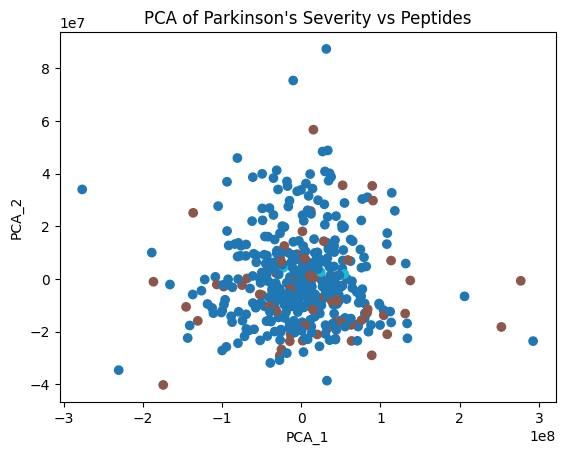

In [105]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=y0, cmap = 'tab10')
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_title("PCA of Parkinson's Severity vs Peptides")
legend3 = ax.legend(*scatter.legend_elements(),bbox_to_anchor=(1.01, 1),
                    loc="upper left", ncol = 1, title="Parkinson's Severity in Terms of UPDRS Score")
ax.add_artist(legend3)

Text(0.5, 1.0, "PCA of Parkinson's Severity vs Peptides")

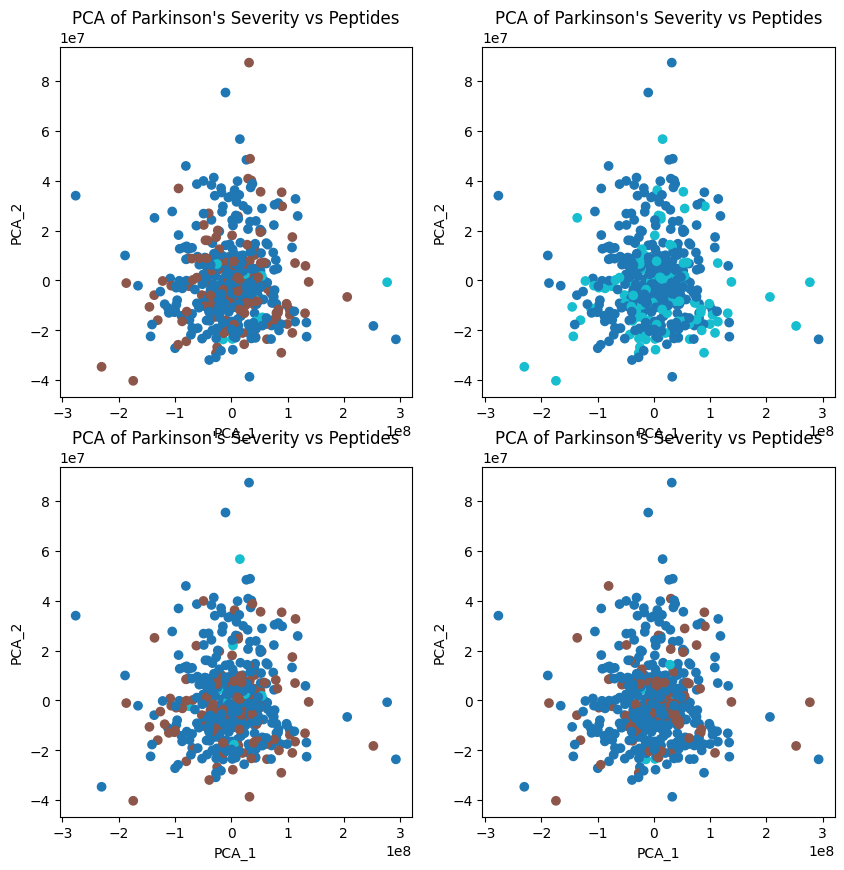

In [106]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.scatter(X_pca[:,0], X_pca[:,1], c=y1, cmap = 'tab10')
ax1.set_xlabel('PCA_1')
ax1.set_ylabel('PCA_2')
ax1.set_title("PCA of Parkinson's Severity vs Peptides")
legend4 = ax.legend(*scatter.legend_elements(),bbox_to_anchor=(1.01, 1),
                    loc="upper left", ncol = 1, title="Parkinson's Severity in Terms of UPDRS-1 Score")
ax2.scatter(X_pca[:,0], X_pca[:,1], c=y2, cmap = 'tab10')
ax2.set_xlabel('PCA_1')
ax2.set_ylabel('PCA_2')
ax2.set_title("PCA of Parkinson's Severity vs Peptides")
legend5 = ax.legend(*scatter.legend_elements(),bbox_to_anchor=(1.01, 1),
                    loc="upper left", ncol = 1, title="Parkinson's Severity in Terms of UPDRS-2 Score")
ax3.scatter(X_pca[:,0], X_pca[:,1], c=y3, cmap = 'tab10')
ax3.set_xlabel('PCA_1')
ax3.set_ylabel('PCA_2')
ax3.set_title("PCA of Parkinson's Severity vs Peptides")
legend6 = ax.legend(*scatter.legend_elements(),bbox_to_anchor=(1.01, 1),
                    loc="upper left", ncol = 1, title="Parkinson's Severity in Terms of UPDRS-3 Score")
ax4.scatter(X_pca[:,0], X_pca[:,1], c=y4, cmap = 'tab10')
ax4.set_xlabel('PCA_1')
ax4.set_ylabel('PCA_2')
ax4.set_title("PCA of Parkinson's Severity vs Peptides")
